<a href="https://colab.research.google.com/github/nadern87/BassDataOsmnx/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Package for data science
import pandas as pd
import numpy as np

# Package for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

# Others
import warnings
warnings.filterwarnings("ignore")

In [17]:
data = pd.read_csv("Bass_BigTable.csv")
data

Price  Id  Size      Format           City  Impression  B01001001  \
0     700   1  44.6  Individual   Lacassine LA       68992       5384   
1     700   2  44.6  Individual   Lacassine LA       68992       5384   
2     700   3  44.6     Stacked   Lacassine LA       68992       4641   
3     700   4  44.6  Individual     Baldwin LA       24379       1534   
4     825   6  44.6  Individual   Lacassine LA       68992       5384   
..    ...  ..   ...         ...            ...         ...        ...   
68    700  85  44.6  Individual   Broussard LA       47152       4155   
69    700  86  44.6  Individual   Broussard LA       44507       3447   
70    700  87  44.6  Individual   Broussard LA       44507       3420   
71    700  89  44.6  Individual  New Iberia LA       32202       3823   
72    700  90  44.6  Individual  New Iberia LA       44507       5384   

    B01001002  B01001003  B01001004  ...  serviceRoad  trackRoad  footwayRoad  \
0        2919        213        152  ...           43          5            4   
1        2919        213        152  ...           52          3           17   
2        2198        174        162  ...          183         10            1   
3         876          6          0  ...           66          2            0   
4        2919        213        152  ...           43          5            4   
..        ...        ...        ...  ...          ...        ...          ...   
68       2139        130        281  ...          196          4           29   
69       1778        108         43  ...          175          2           18   
70       1759        120         48  ...          175          2           18   
71       1878         93        313  ...          599          3          196   
72       2919        213        152  ...           43          5            4   

    pathRoad  traffic_signals  aggr_residential_zone  aggr_commercial_zone  \
0          0                0                      2                     1   
1          0                0                      3                     1   
2          0                0                      1                     0   
3          0                0                      0                     0   
4          0                0                      2                     1   
..       ...              ...                    ...                   ...   
68         0                1                     10                     1   
69         0                0                      4                     0   
70         0                0                      4                     0   
71        18                0                     18                    30   
72         0                0                      2                     1   

    aggr_natural_zone  BFP_Count  BFP_Area  
0                  29         22    694.83  
1                  30         12    486.00  
2                  42         38    919.75  
3                  21        125   1430.83  
4                  29         22    694.83  
..                ...        ...       ...  
68                 33         23   4313.40  
69                 16        131   3833.17  
70                 16        115   3833.17  
71                 36         34   5431.19  
72                 29         22    694.83  

[73 rows x 408 columns]

### 2.1 Checking target variable

In [18]:
target = data["Price"]
target.describe()

count      73.000000
mean      744.863014
std       154.389417
min       500.000000
25%       700.000000
50%       700.000000
75%       800.000000
max      1500.000000
Name: Price, dtype: float64

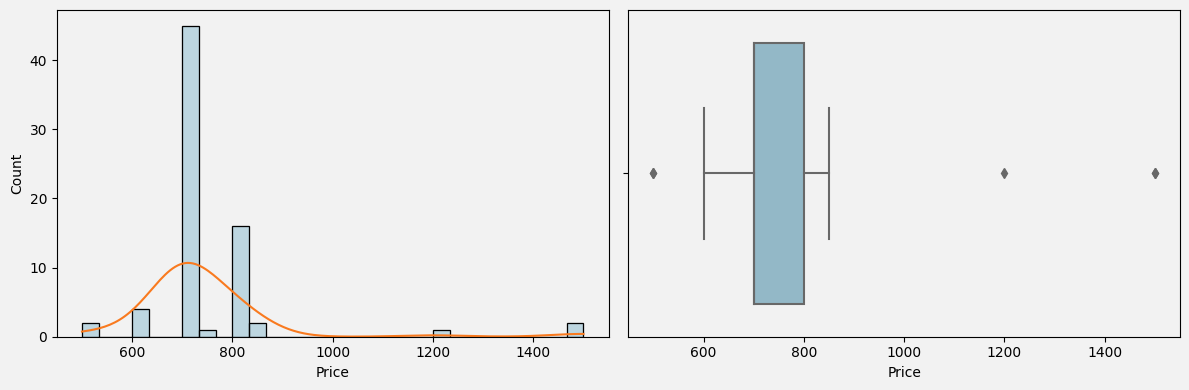

In [19]:
### Chekcing target varlable
fig, ax  = plt.subplots(1,2,figsize=(12,4))
fig.patch.set_facecolor( '#F2F2F2')

sns.histplot(target, bins=30, color='#8abbd0', kde=True, ax=ax[0])
ax[0].patch.set_facecolor( '#F2F2F2')
ax[0].lines[0].set_color('#F97A1F')

sns.boxplot(x=target, ax=ax[1], color='#8abbd0')
ax[1].patch.set_facecolor('#F2F2F2')

plt.tight_layout()

### 2.2 Chekcing numerical features

In [20]:
# Checking statstical summary for numerical columns
data.describe()

Price         Id        Size     Impression    B01001001  \
count    73.000000  73.000000   73.000000      73.000000    73.000000   
mean    744.863014  44.041096   44.023288   52035.849315  3711.246575   
std     154.389417  26.299260    8.867098   21407.470588  1222.877410   
min     500.000000   1.000000   32.500000    3586.000000  1012.000000   
25%     700.000000  21.000000   44.600000   36502.000000  3146.000000   
50%     700.000000  43.000000   44.600000   47980.000000  3623.000000   
75%     800.000000  66.000000   44.600000   68992.000000  4625.000000   
max    1500.000000  90.000000  111.500000  109883.000000  6494.000000   

         B01001002   B01001003   B01001004   B01001005   B01001006  ...  \
count    73.000000   73.000000   73.000000   73.000000   73.000000  ...   
mean   1858.424658  126.150685  166.589041  133.328767   72.219178  ...   
std     625.578220   71.374145  100.748013   94.785438   40.853820  ...   
min     511.000000    0.000000    0.000000    6.000000    0.000000  ...   
25%    1556.000000   79.000000   74.000000   64.000000   44.000000  ...   
50%    1877.000000  114.000000  152.000000  108.000000   64.000000  ...   
75%    2157.000000  173.000000  274.000000  169.000000   87.000000  ...   
max    3017.000000  302.000000  342.000000  425.000000  208.000000  ...   

       serviceRoad  trackRoad  footwayRoad   pathRoad  traffic_signals  \
count    73.000000  73.000000    73.000000  73.000000        73.000000   
mean    249.808219   4.000000    52.835616   3.383562         1.657534   
std     211.039271   4.893306    69.821203   6.516283         4.773245   
min      24.000000   0.000000     0.000000   0.000000         0.000000   
25%      76.000000   2.000000     3.000000   0.000000         0.000000   
50%     176.000000   3.000000    29.000000   0.000000         0.000000   
75%     415.000000   5.000000    60.000000   0.000000         1.000000   
max     779.000000  38.000000   264.000000  18.000000        25.000000   

       aggr_residential_zone  aggr_commercial_zone  aggr_natural_zone  \
count              73.000000             73.000000          73.000000   
mean                8.273973              5.780822          25.726027   
std                 7.213529             10.495034          20.904053   
min                 0.000000              0.000000           1.000000   
25%                 2.000000              0.000000          15.000000   
50%                 7.000000              1.000000          23.000000   
75%                14.000000              1.000000          33.000000   
max                27.000000             33.000000         159.000000   

        BFP_Count      BFP_Area  
count   73.000000     73.000000  
mean    61.561644   4530.302192  
std     75.915704   6159.827161  
min      4.000000    217.610000  
25%     20.000000   1211.610000  
50%     34.000000   2220.580000  
75%     72.000000   4313.400000  
max    419.000000  36835.790000  

[8 rows x 406 columns]

In [23]:
# Calculate the correlation matrix
correlation_matrix = data.drop('Price', axis=1).corr().abs()

# Find pairs of highly correlated features
highly_correlated_pairs = []
correlation_threshold = 0.8  # Set the correlation threshold as desired

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)

# Create a DataFrame to store the highly correlated feature pairs
df_highly_correlated_pairs = pd.DataFrame(highly_correlated_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Print the DataFrame of highly correlated feature pairs
print(df_highly_correlated_pairs)

        Feature 1              Feature 2  Correlation
0       B01001001              B01001002     0.980203
1       B01001001              B01001012     0.870796
2       B01001001              B01001026     0.979977
3       B01001001              B01001038     0.806708
4       B01001001              B08008001     0.952785
...           ...                    ...          ...
2737  serviceRoad  aggr_residential_zone     0.802629
2738  serviceRoad   aggr_commercial_zone     0.864481
2739  footwayRoad               pathRoad     0.941768
2740  footwayRoad   aggr_commercial_zone     0.967011
2741     pathRoad   aggr_commercial_zone     0.956571

[2742 rows x 3 columns]


In [25]:
# Find duplicated pairs (considering both [feature1, feature2] and [feature2, feature1])
df_highly_correlated_pairs['Sorted Features'] = df_highly_correlated_pairs[['Feature 1', 'Feature 2']].apply(sorted, axis=1)
duplicated_pairs = df_highly_correlated_pairs[df_highly_correlated_pairs.duplicated(subset='Sorted Features', keep=False)]

# Display duplicated pairs
print(duplicated_pairs)

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation, Sorted Features]
Index: []


In [6]:
# Identify feature pairs that have correlation > 0.9  and < - 0.9
correlation_table = pd.DataFrame(data.corr().unstack().sort_values().drop_duplicates(), columns=['correlation'])
high_corr_table = correlation_table[(correlation_table['correlation'] >0.9) | (correlation_table['correlation'] < -0.9)].sort_values(by='correlation', ascending = False)
high_corr_table

correlation
BFP_Count   BFP_Count     1.000000
B14004017   B14003029     0.999984
B01001030   B14004030     0.999959
B14004032.1 B14003056     0.999944
B23025003   B23025002     0.999903
...                            ...
B23025004   B09019010     0.900560
B23025007   B14007019     0.900418
B24080002   B01001002     0.900079
B14004008.1 B14003018     0.900054
B08008006   B09019002     0.900053

[614 rows x 1 columns]

In [7]:
# Extract the highly correlated features from column 1
high_corr_features_col1 = list(high_corr_table.index.get_level_values(0).unique())
print(high_corr_features_col1)

['BFP_Count', 'B14004017', 'B01001030', 'B14004032.1', 'B23025003', 'B14004028.1', 'B14004022.1', 'B08008001', 'B14007001.1', 'B24080012', 'B14003028', 'B24080014', 'B01001026', 'B01001002', 'B14003057', 'B24080002', 'B24080004', 'B23025001', 'B09019002', 'B14004018.1', 'B14004002', 'B14004003', 'B14002026', 'B14002030', 'B14004029', 'B14004018', 'B15002001', 'B14002041', 'B14002025', 'B09019001', 'B14004005', 'B14007019', 'B15002002.1', 'B15002002', 'B24080001', 'B14004001', 'B14002020', 'B14002049', 'B09019015', 'B15002001.1', 'B14002037', 'B14004013.1', 'B14003039', 'B08008004', 'B01001001', 'B14004029.1', 'B14002001', 'B14003002', 'B25002001', 'B15002019', 'B08008014', 'B14003023', 'B14004017.1', 'B08008007', 'B14007019.1', 'B08008010', 'B14003009', 'B14004030.1', 'B14002011', 'B14003035', 'B14004013', 'B14004033', 'B14004012', 'B01001005', 'B14002002', 'B14003029', 'B14002027', 'B24080003', 'B09019004', 'B25002002', 'B14003036', 'B08008012', 'aggr_commercial_zone', 'B09019003', 'B

In [8]:
# Create a subset of the data using only the highly correlated features in high_corr_features_col1
data_subset = data.loc[:, high_corr_features_col1]
print(data_subset)

    BFP_Count  B14004017  B01001030  B14004032.1  B23025003  B14004028.1  \
0          22       1570        126          258       2367            0   
1          12       1570        126          258       2367            0   
2          38       1056         67          314       2108            0   
3         125        599         15           44        585            0   
4          22       1570        126          258       2367            0   
..        ...        ...        ...          ...        ...          ...   
68         23       1107        188          277       2013            5   
69        131        992         82          180       1443            6   
70        115        977         81          190       1436            5   
71         34        717        130          277       1696            0   
72         22       1570        126          258       2367            0   

    B14004022.1  B08008001  B14007001.1  B24080012  ...  B14002046  \
0            17  

In [9]:
# Remove duplicate columns if they exist
data_subset = data_subset.T.drop_duplicates().T

print(data_subset)

    BFP_Count  B14004017  B01001030  B14004032.1  B23025003  B14004028.1  \
0          22       1570        126          258       2367            0   
1          12       1570        126          258       2367            0   
2          38       1056         67          314       2108            0   
3         125        599         15           44        585            0   
4          22       1570        126          258       2367            0   
..        ...        ...        ...          ...        ...          ...   
68         23       1107        188          277       2013            5   
69        131        992         82          180       1443            6   
70        115        977         81          190       1436            5   
71         34        717        130          277       1696            0   
72         22       1570        126          258       2367            0   

    B14004022.1  B08008001  B14007001.1  B24080012  ...  B09019014  B14007002  \
0     

In [10]:
data_subset = pd.merge(data_subset, data[['Price']], left_index=True, right_index=True)


In [12]:
data_subset.columns

Index(['BFP_Count', 'B14004017', 'B01001030', 'B14004032.1', 'B23025003',
       'B14004028.1', 'B14004022.1', 'B08008001', 'B14007001.1', 'B24080012',
       ...
       'B14007002', 'B09019010', 'B14002046', 'B14002007', 'B15002011',
       'B14002036', 'B01001012', 'B23025007', 'B14004020', 'Price'],
      dtype='object', length=117)

In [14]:
# Check the correnlation between features and target
data_subset_corr = data_subset.corr()['Price'].sort_values(ascending=False).drop(['Price'])
data_subset_corr.head(20)

B08008003           0.448674
B08008012           0.366939
B08008002           0.341048
B14004022.1         0.305708
B08008007           0.300772
primary_linkRoad    0.298003
B14004030.1         0.288814
B01001030           0.288330
B14004019.1         0.279941
B14003035           0.278882
B24080013           0.270097
B24080014           0.265153
B25002001           0.263591
B14002044           0.255985
B08008011           0.244444
B24080012           0.241199
B08008009           0.236381
B08008004           0.233325
B14002027           0.231725
B14004018.1         0.228415
Name: Price, dtype: float64

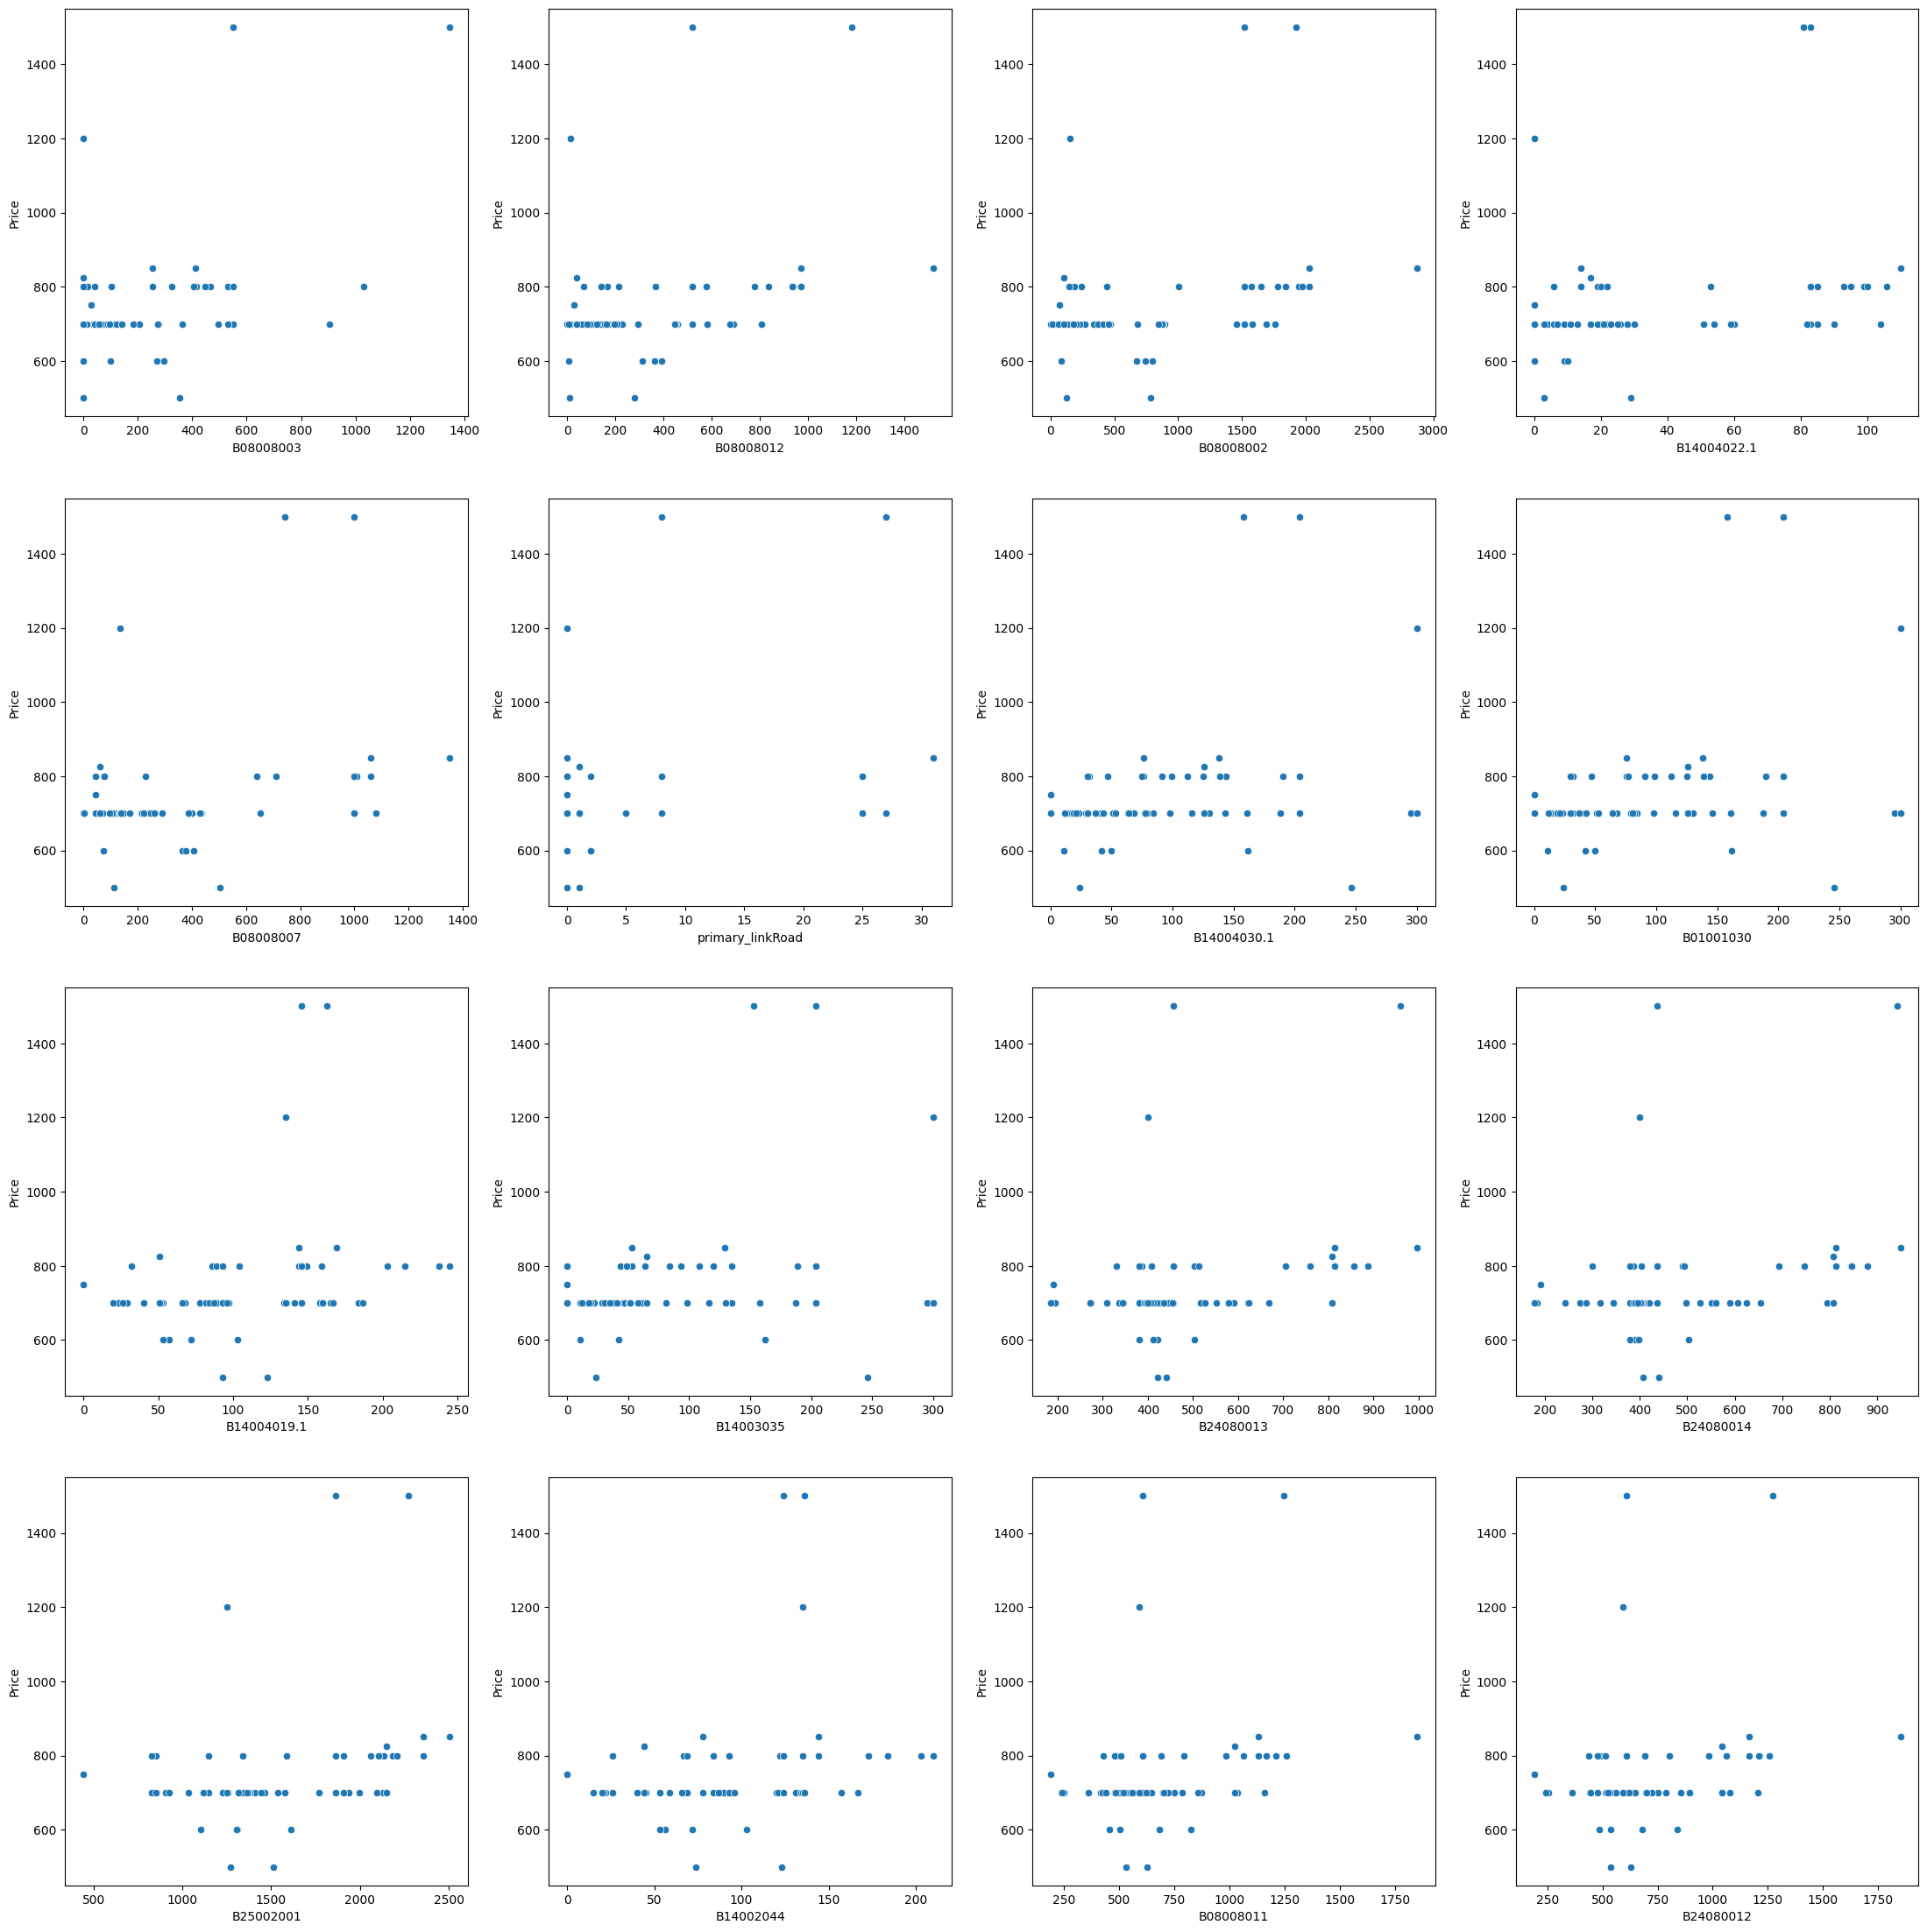

In [15]:
# Visualize the 16 features which has the highest correlation with the target
fig, axs = plt.subplots(4, 4, figsize=(18, 18))
plt.subplots_adjust(right=1.3, top=1.3)
axs = axs.flatten()
for i, col in enumerate(list(data_subset_corr.index[:16])):
    sns.scatterplot(y='Price', x=col, ax=axs[i], data=data_subset)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price')
plt.show()

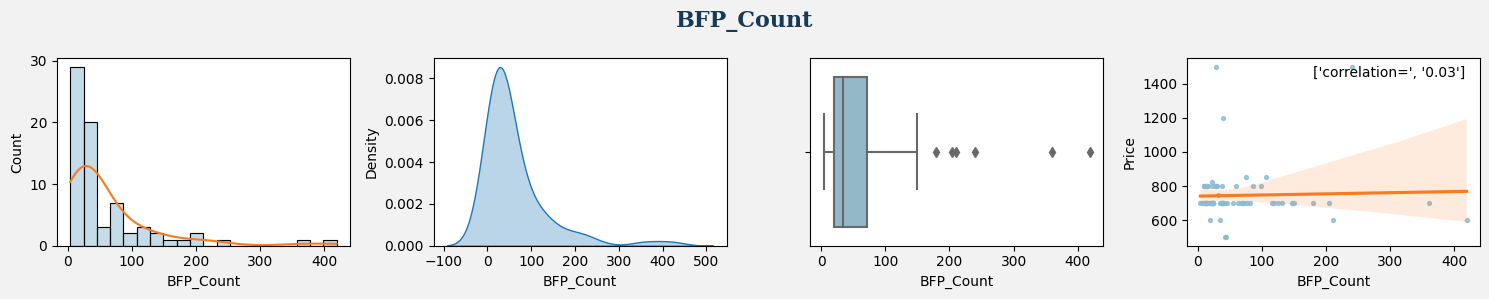

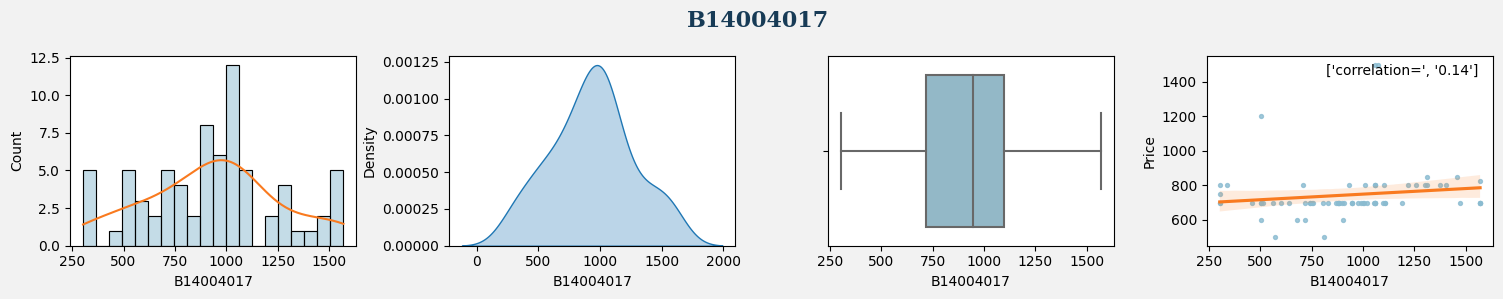

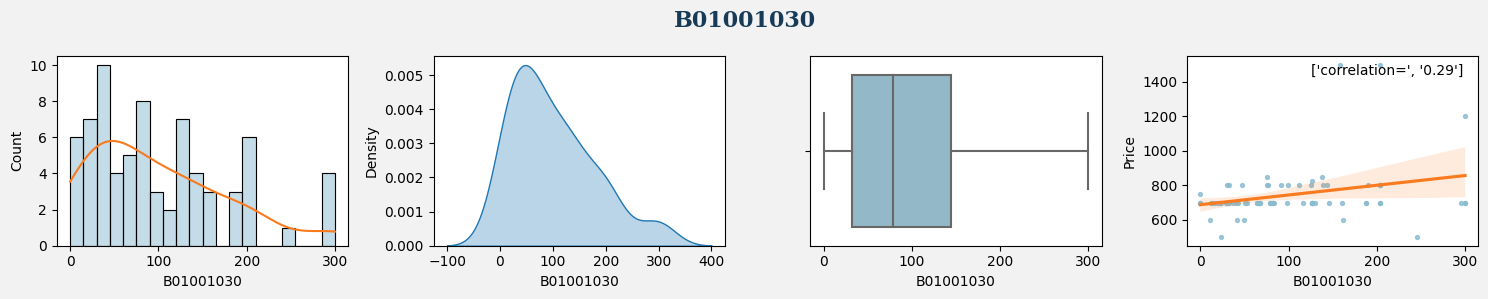

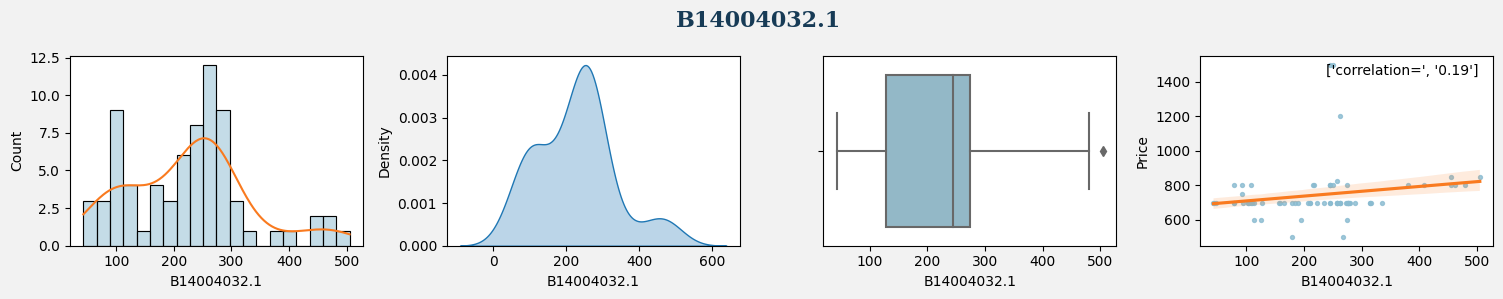

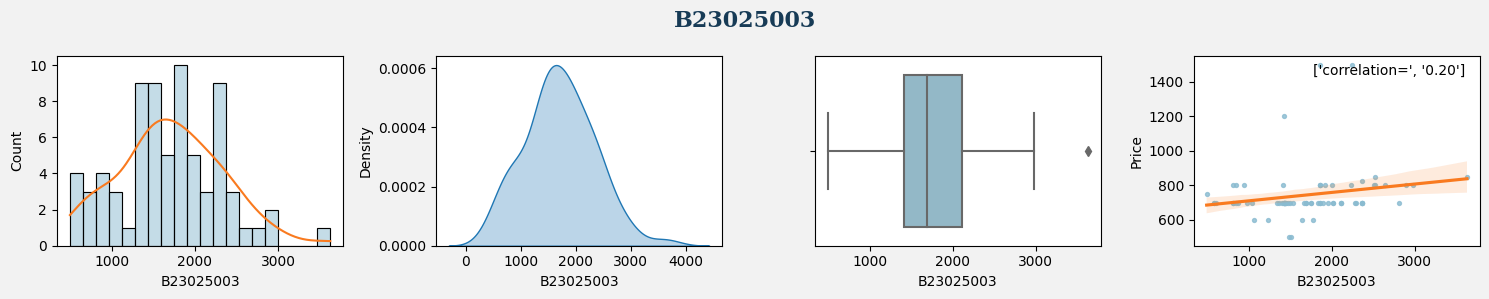

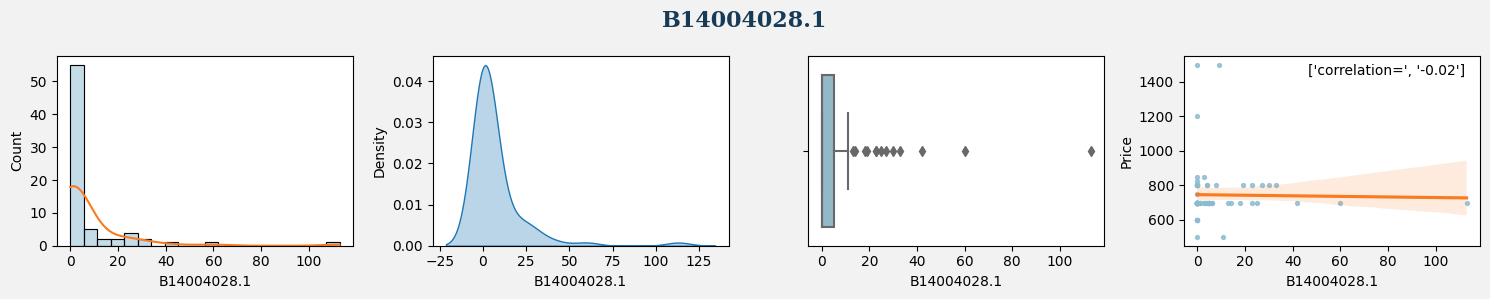

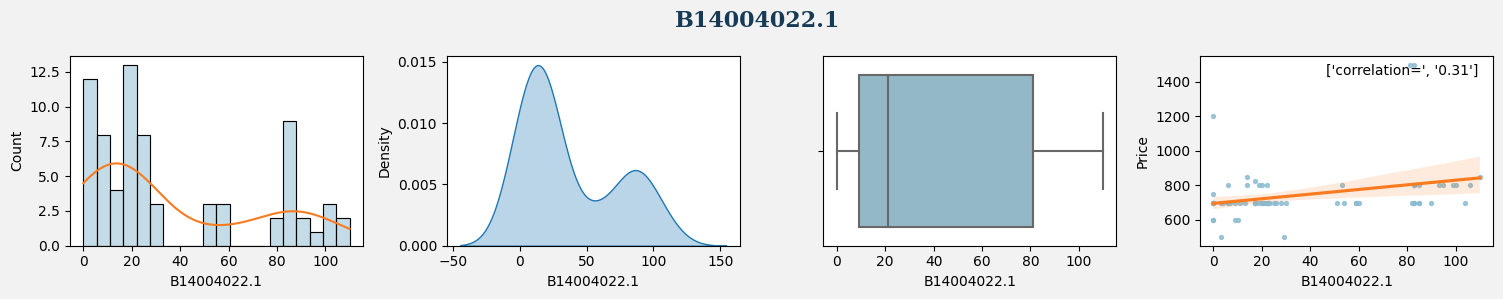

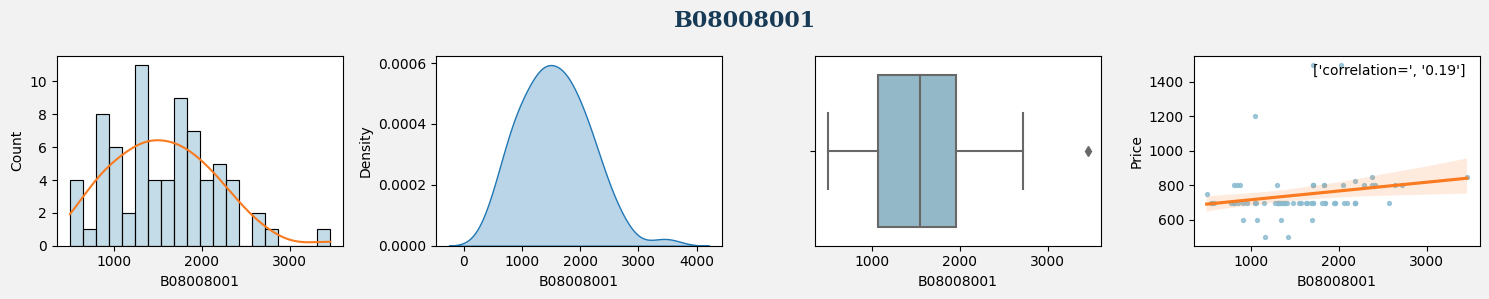

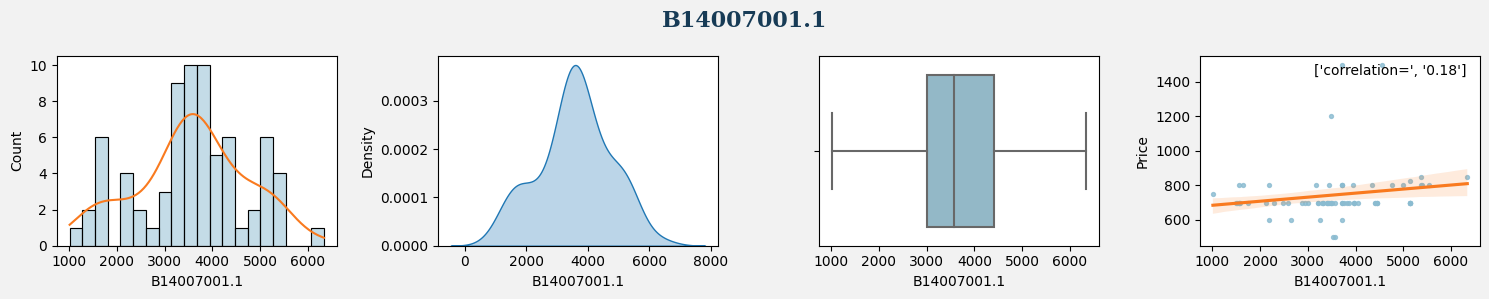

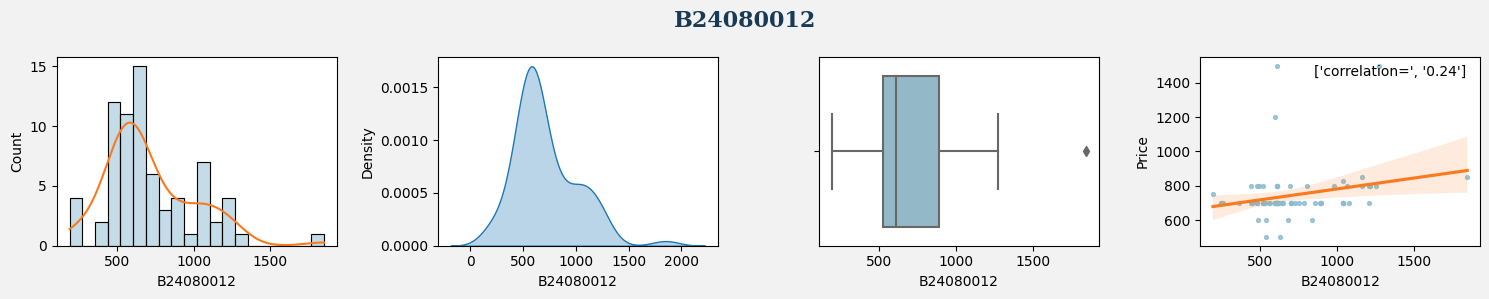

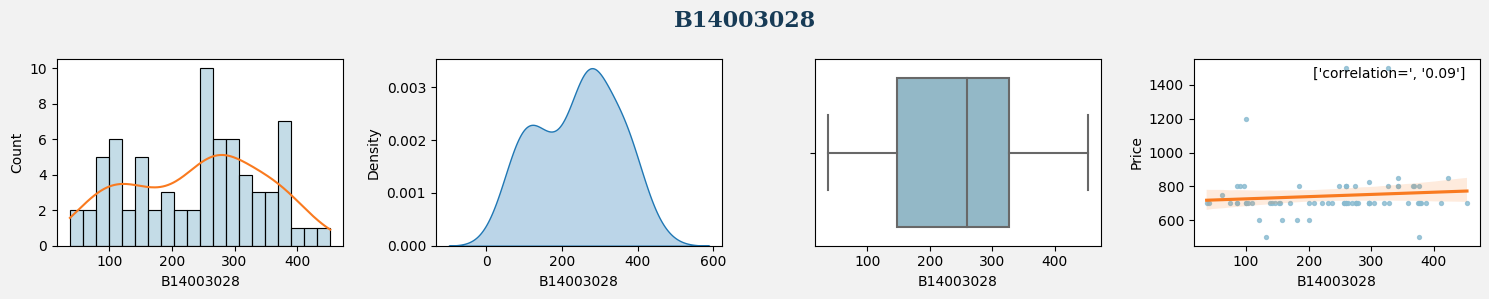

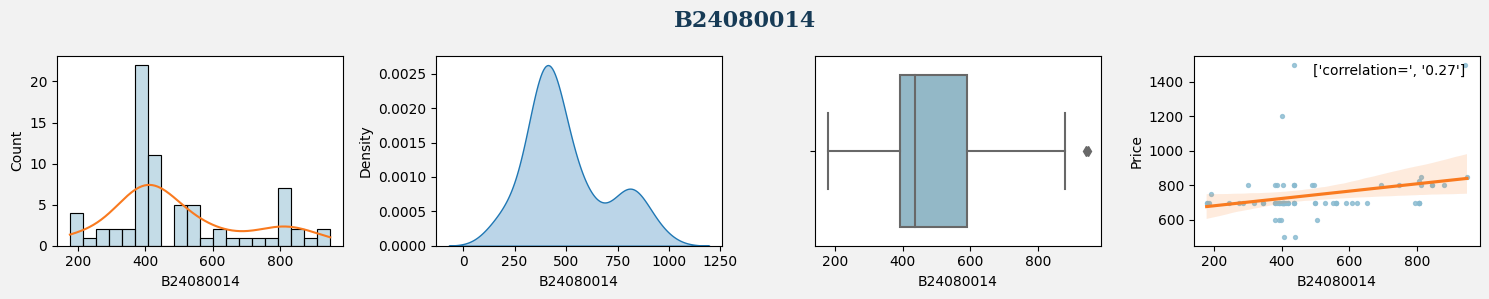

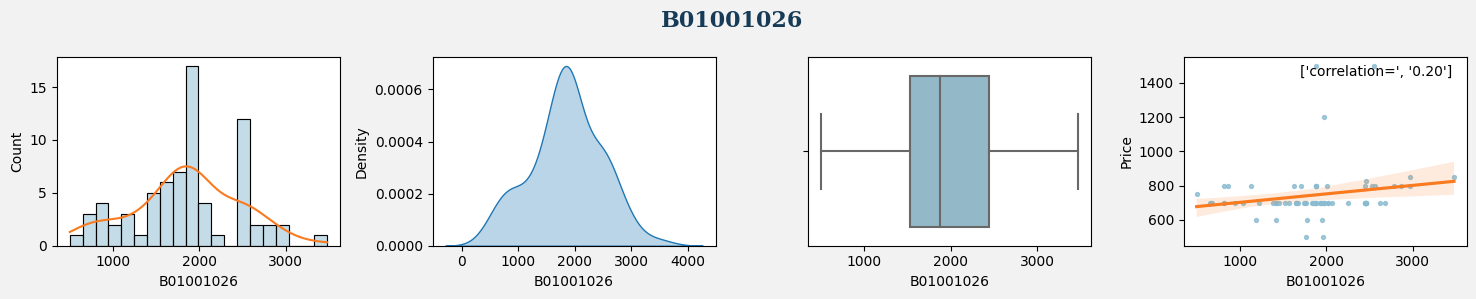

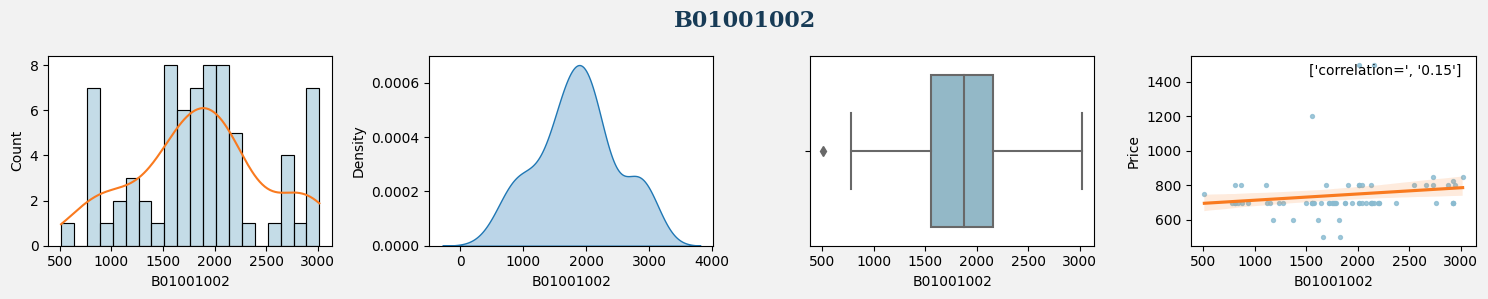

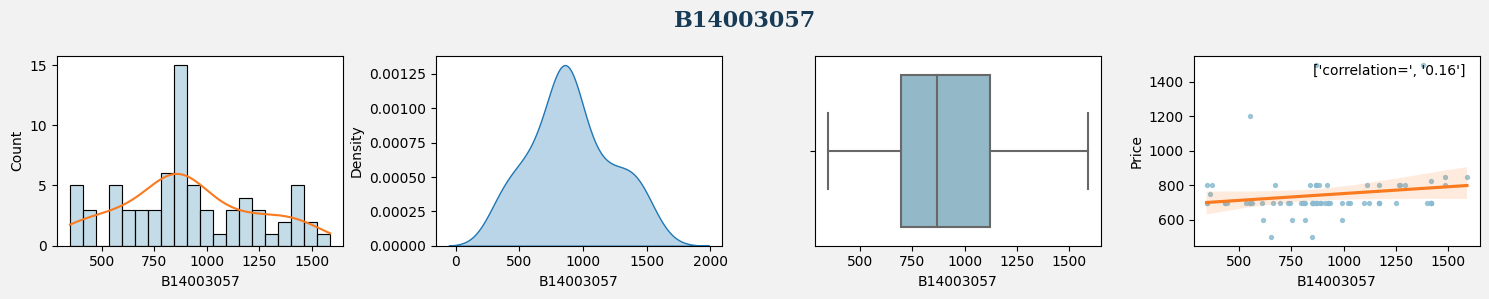

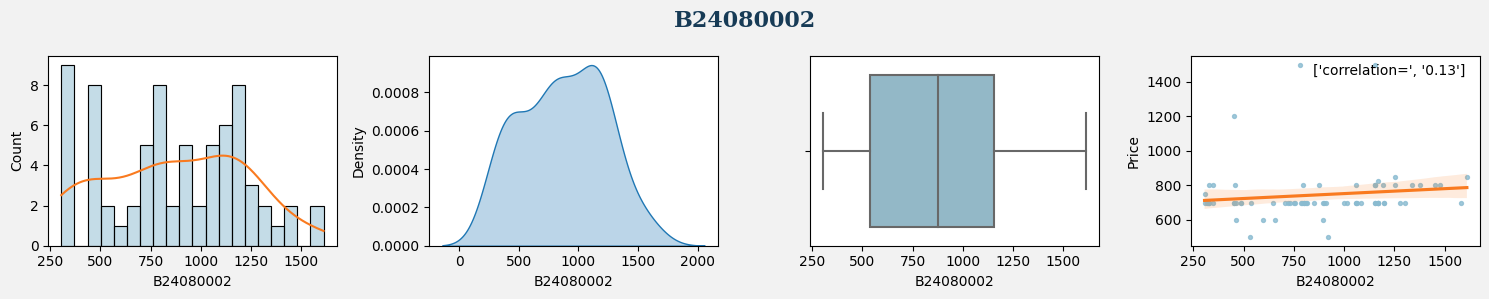

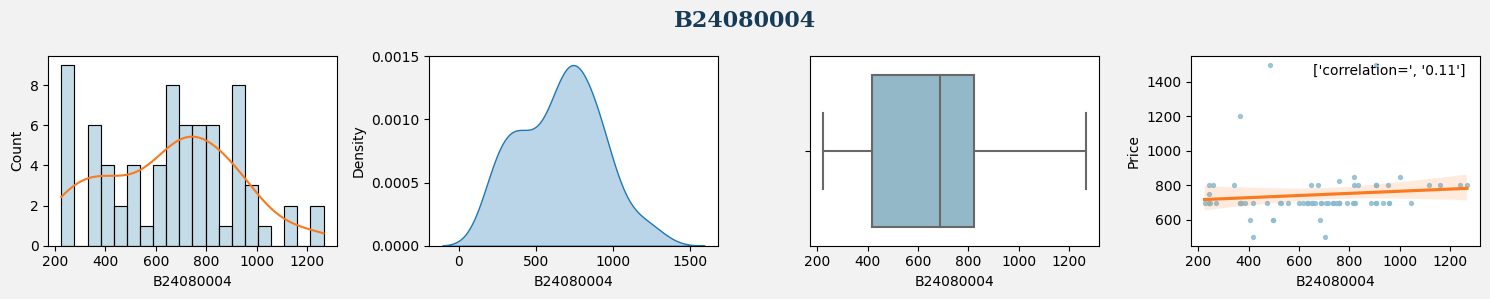

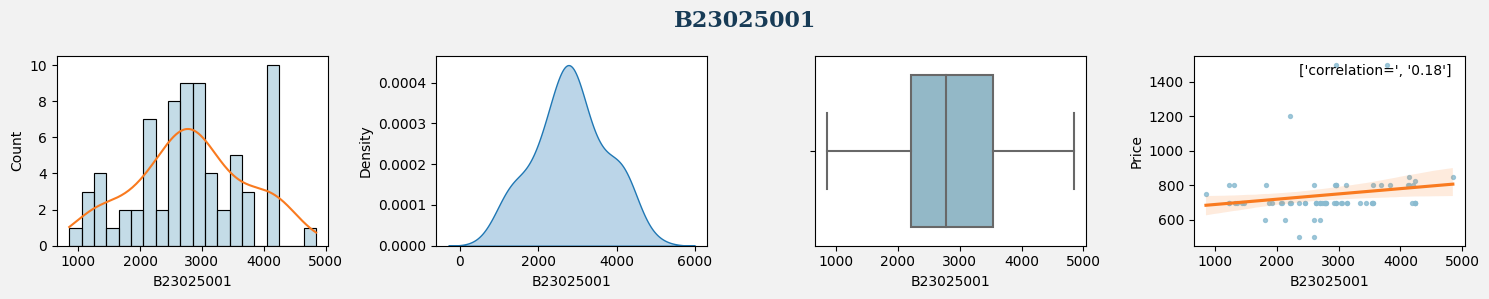

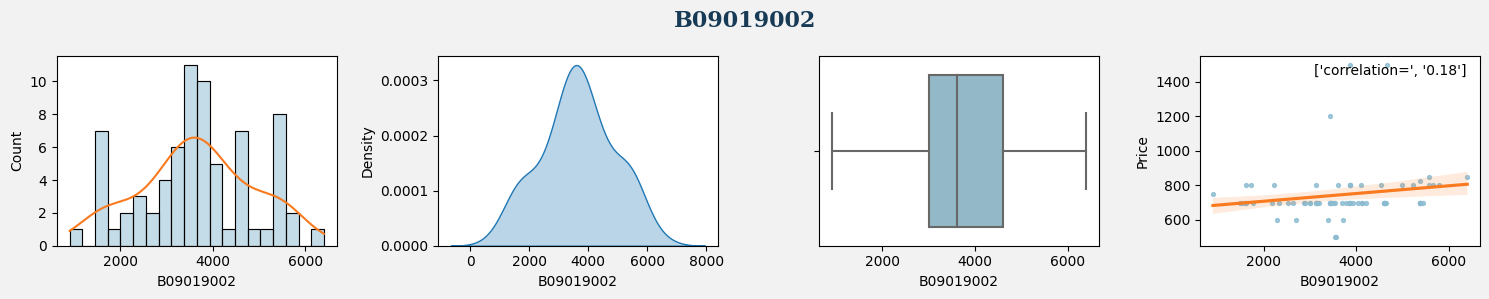

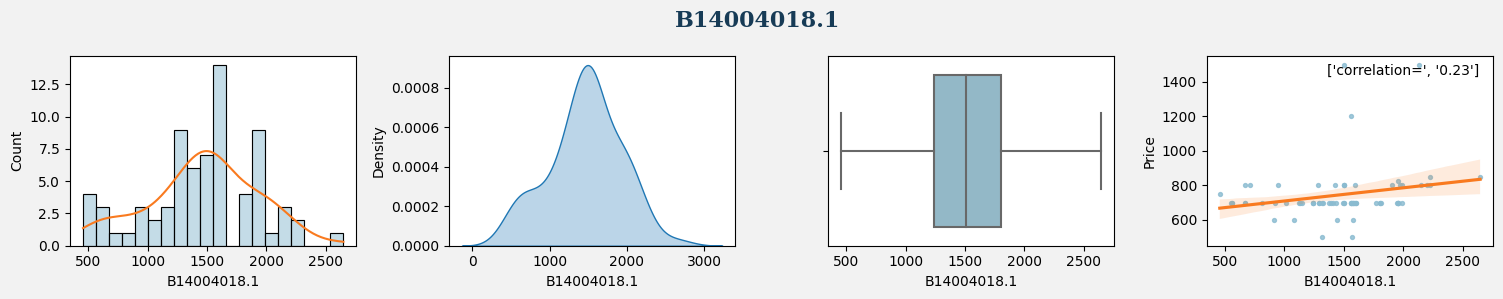

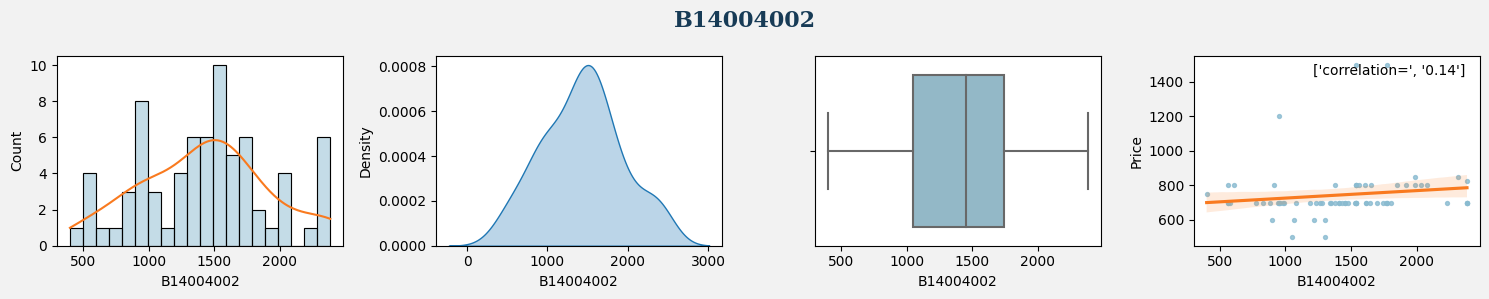

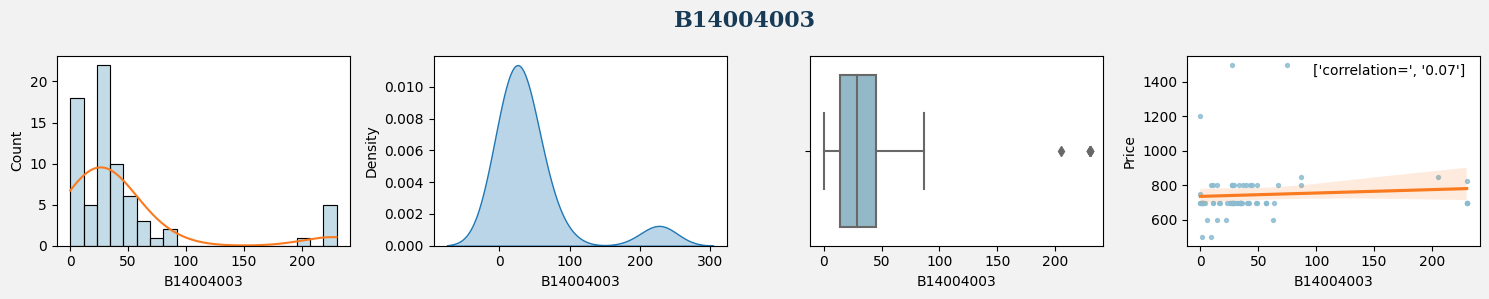

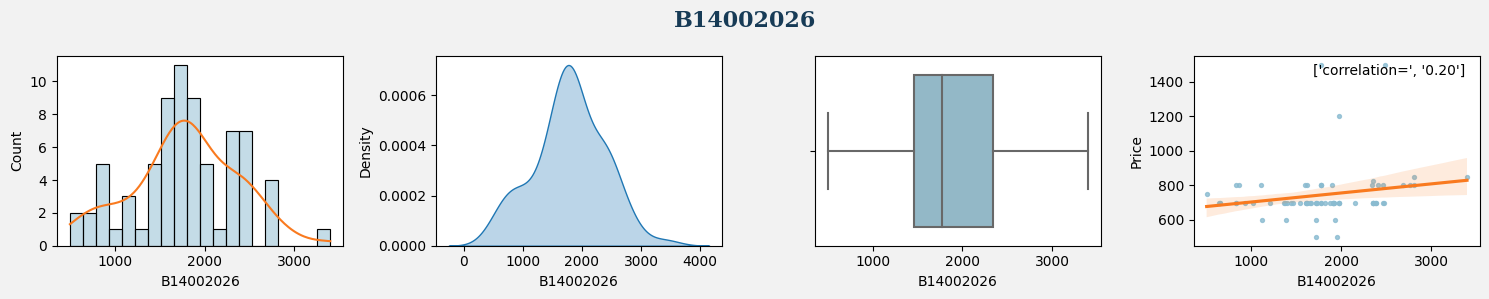

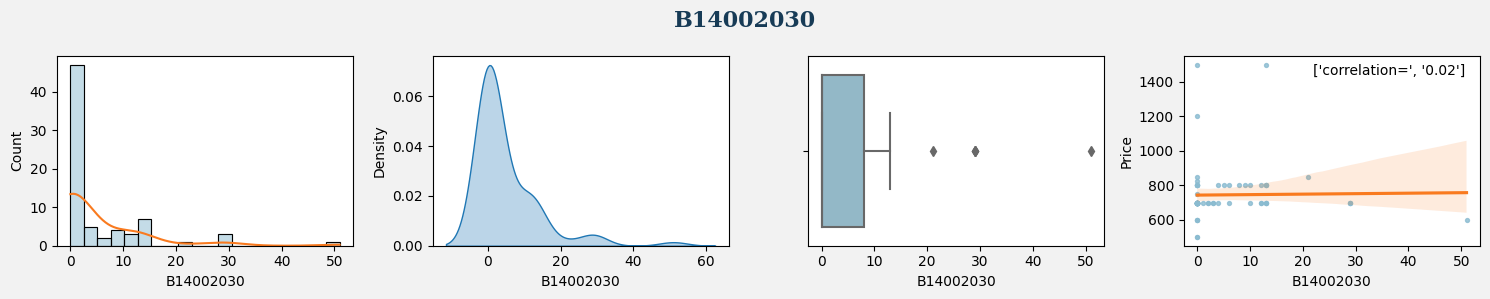

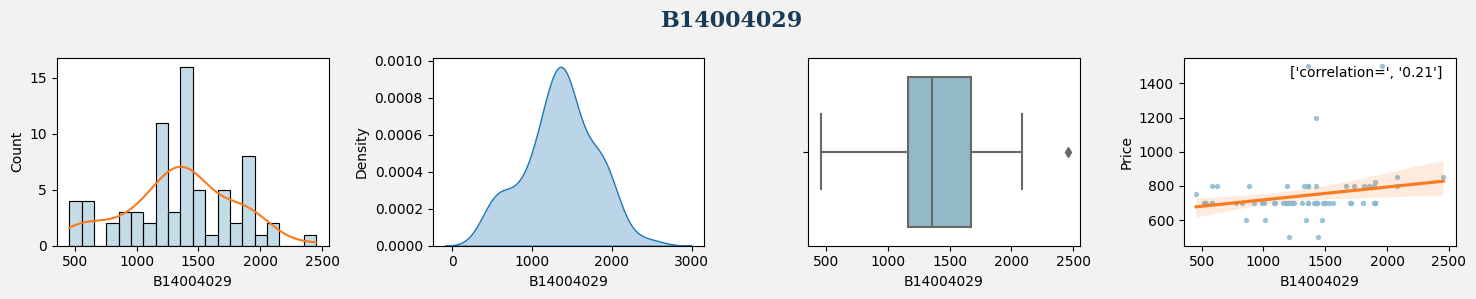

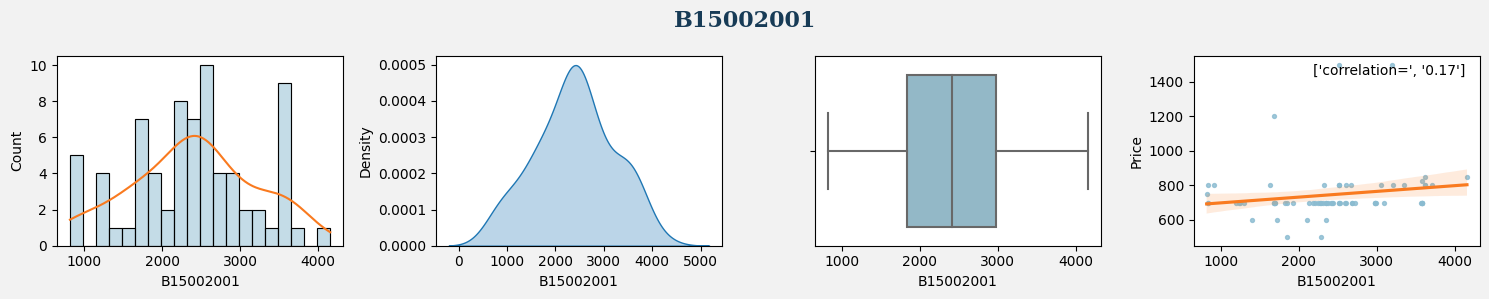

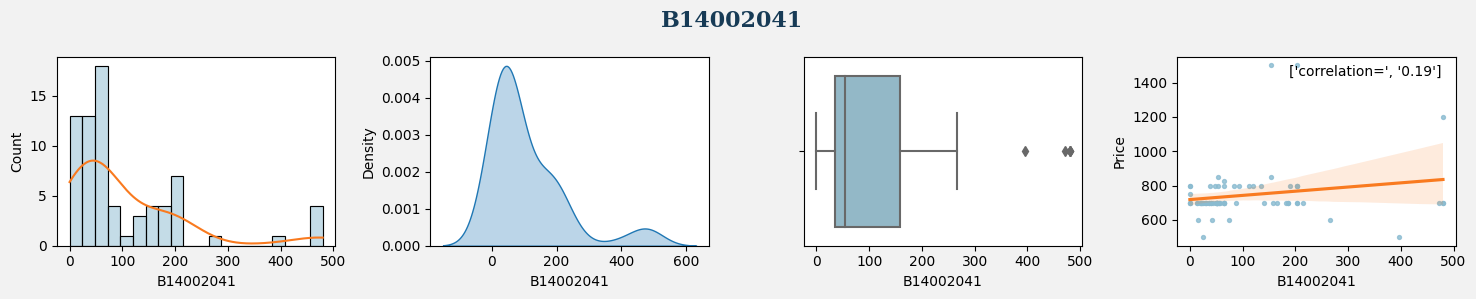

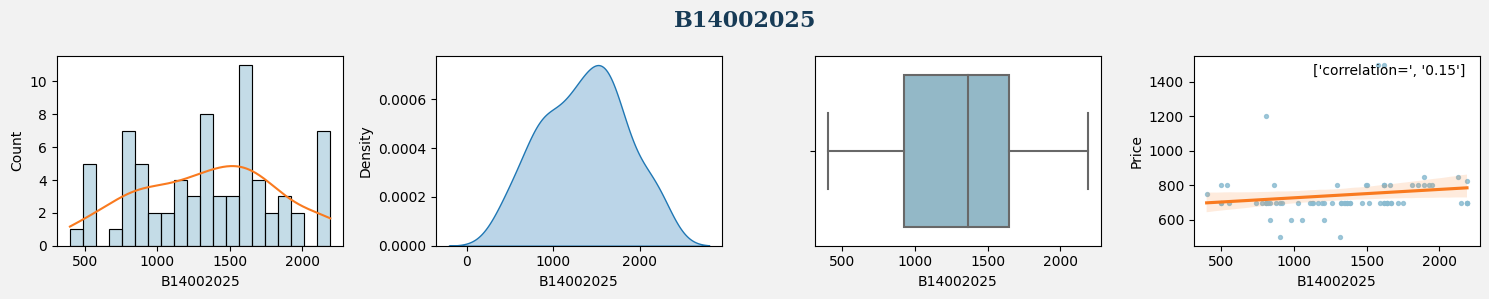

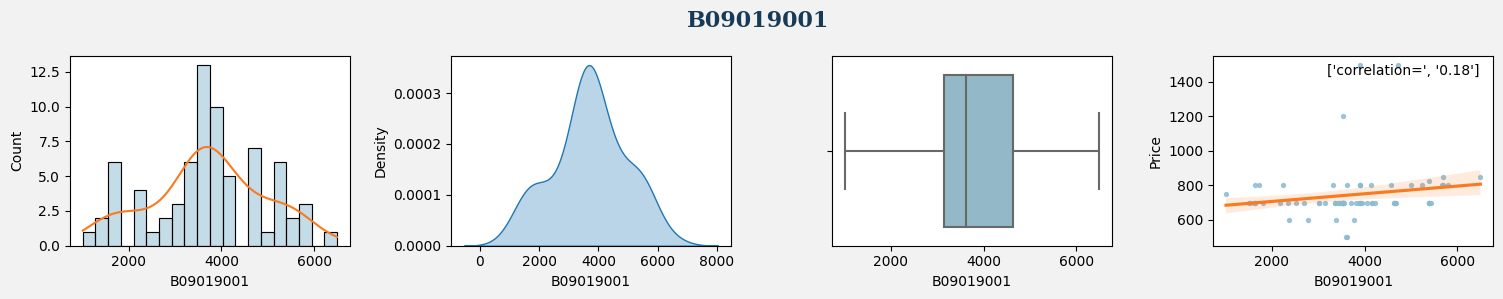

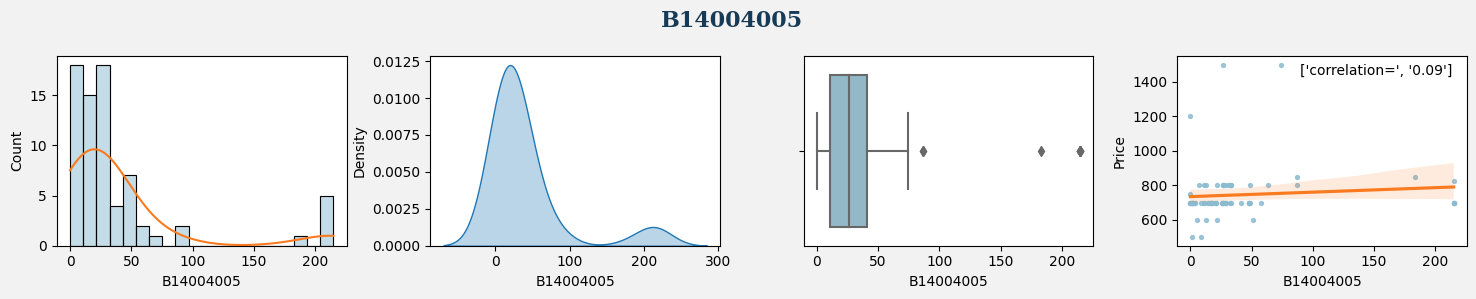

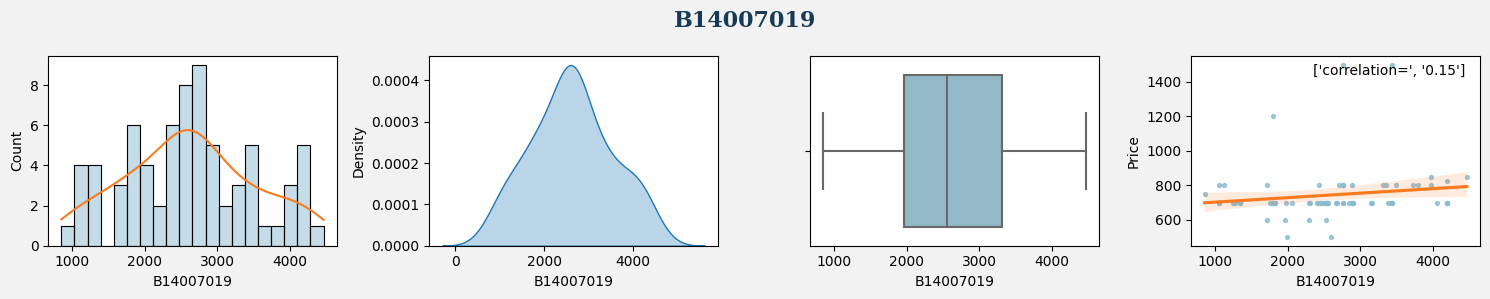

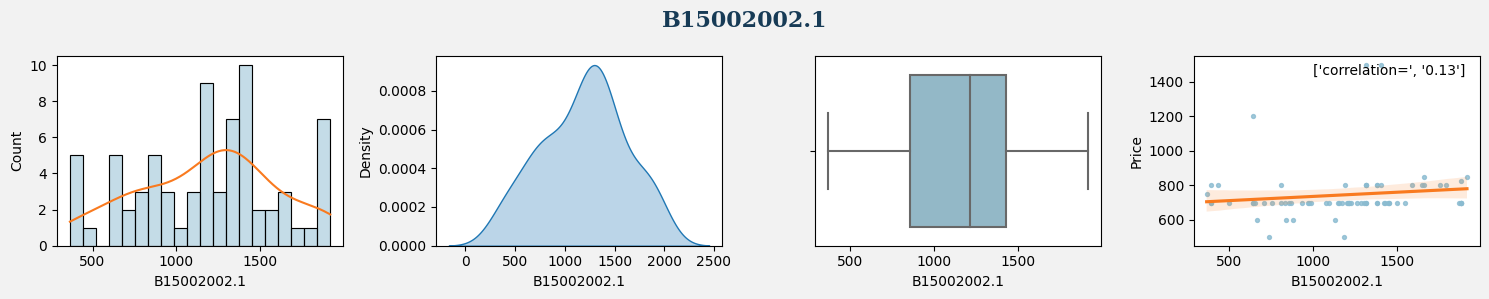

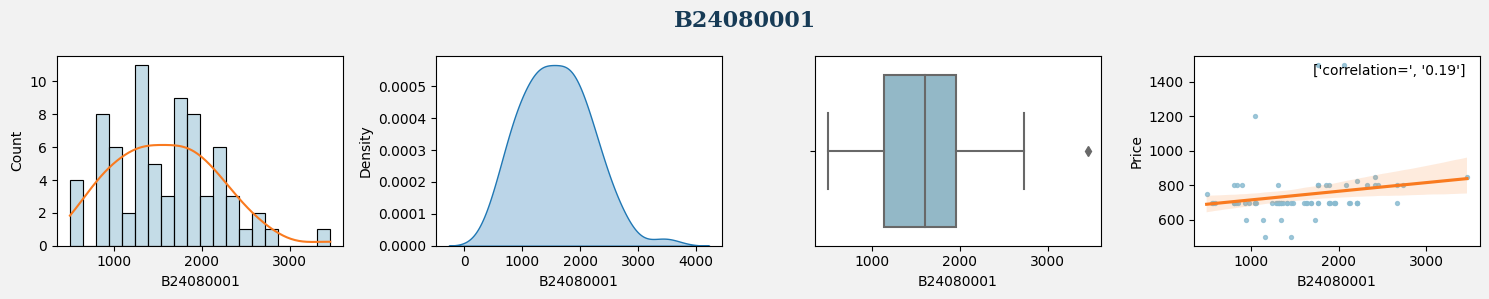

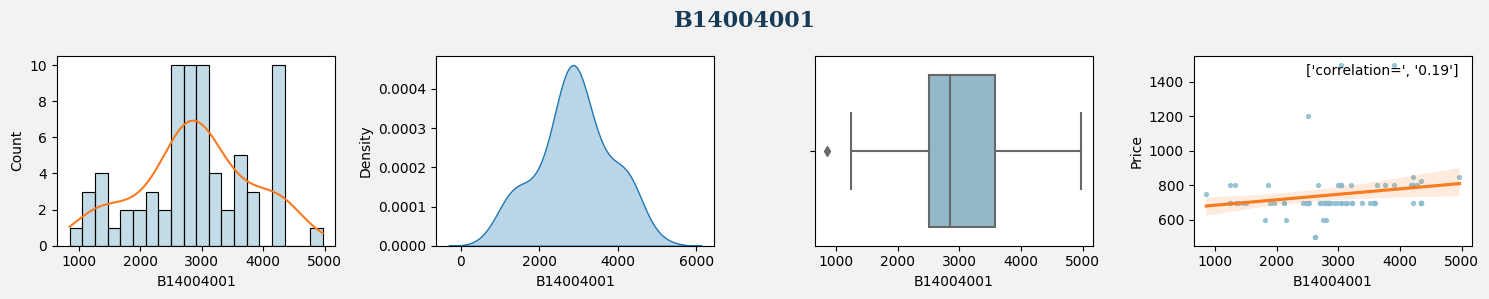

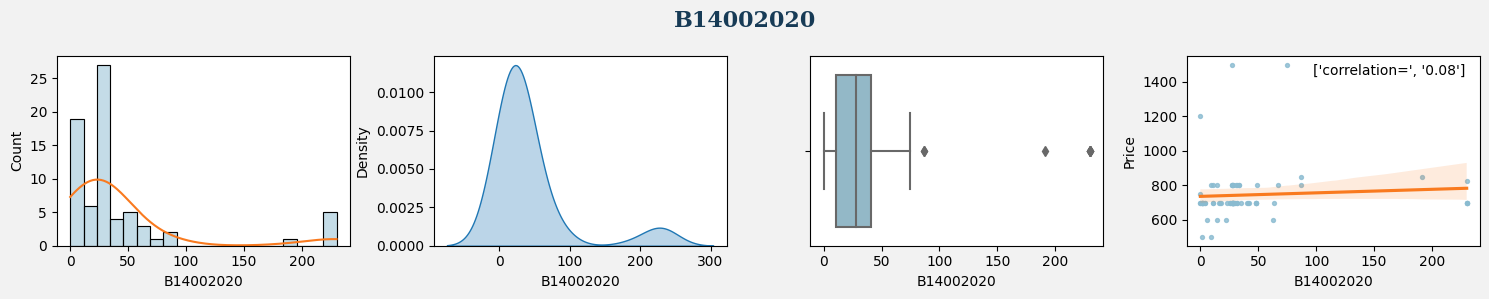

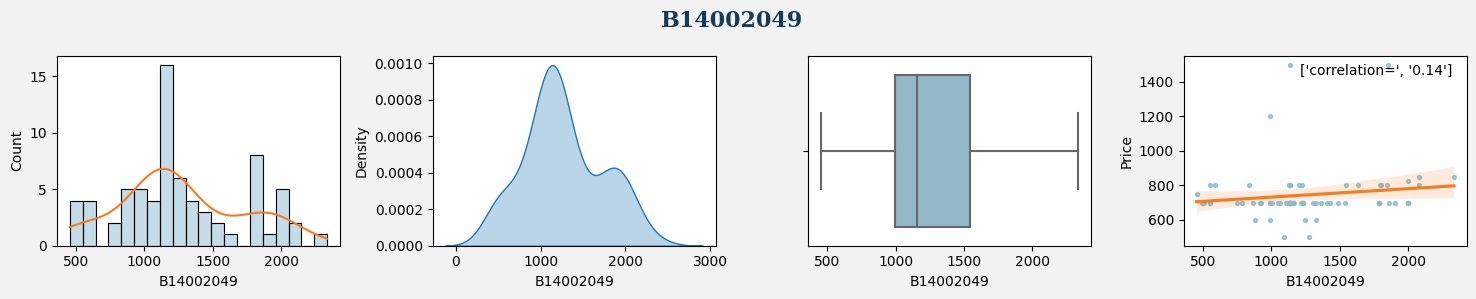

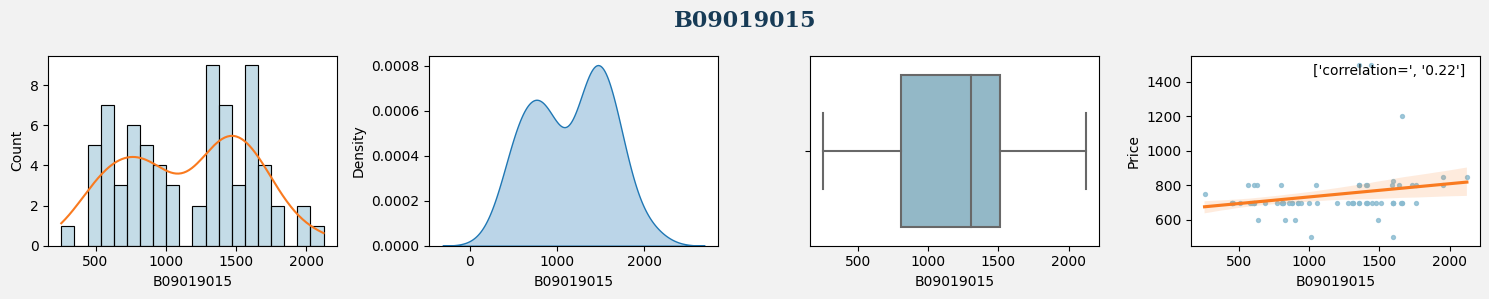

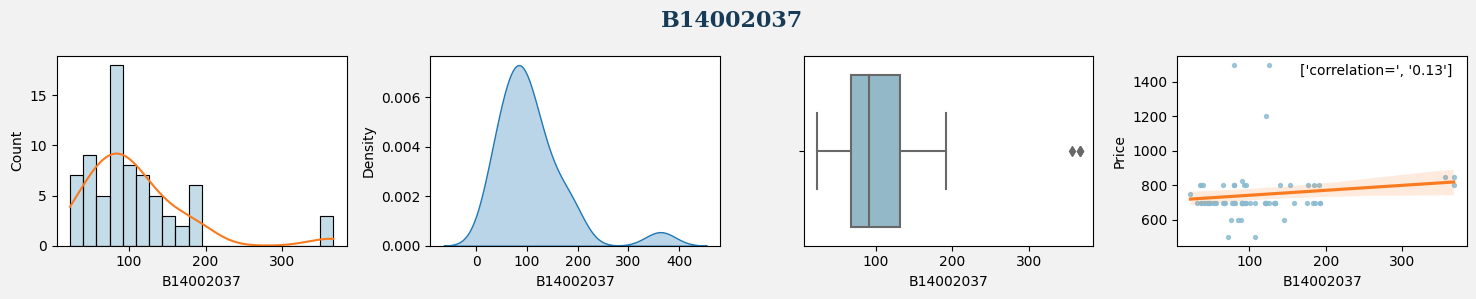

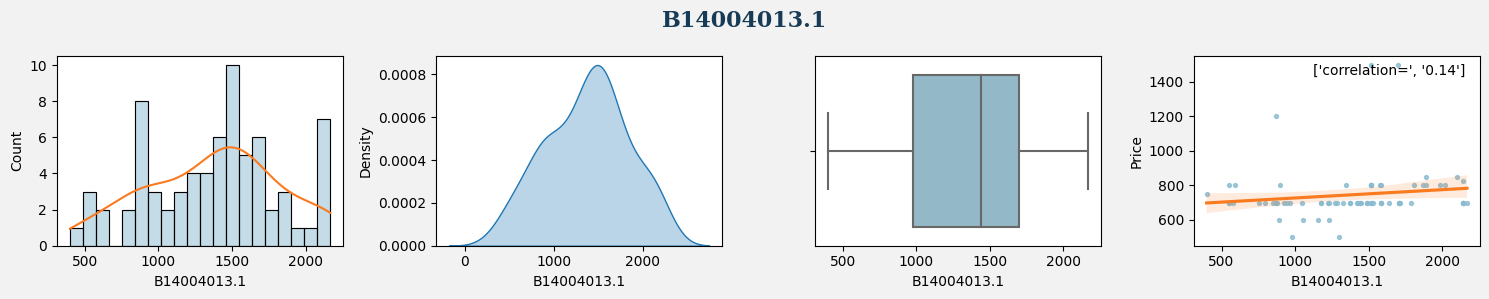

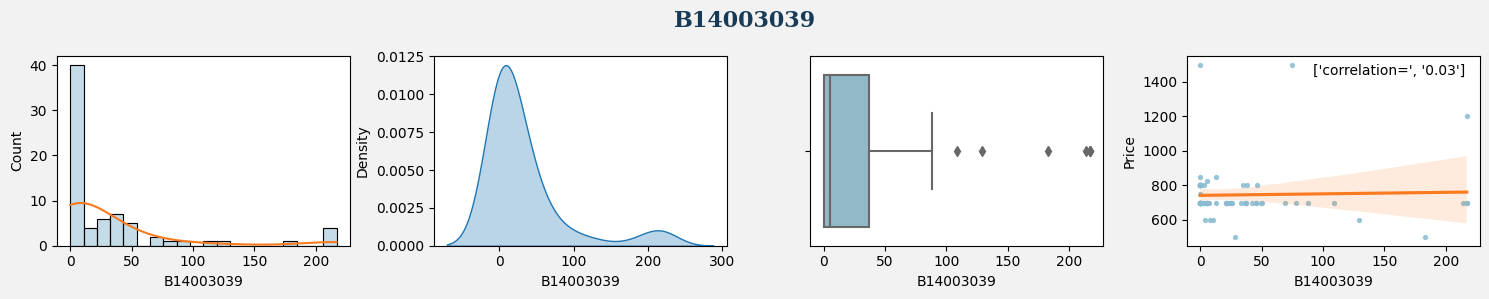

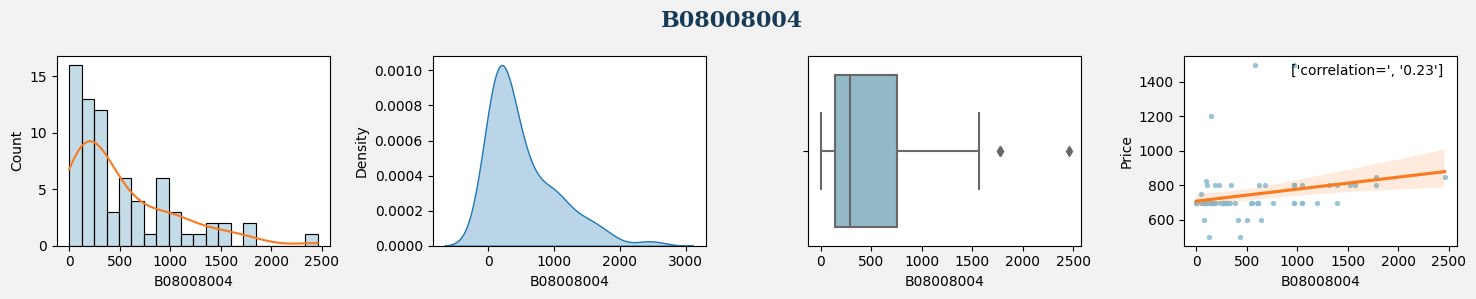

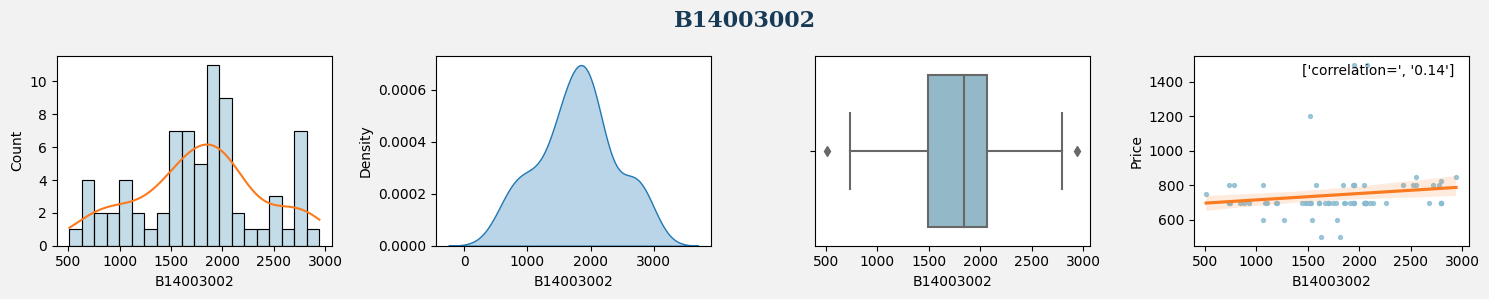

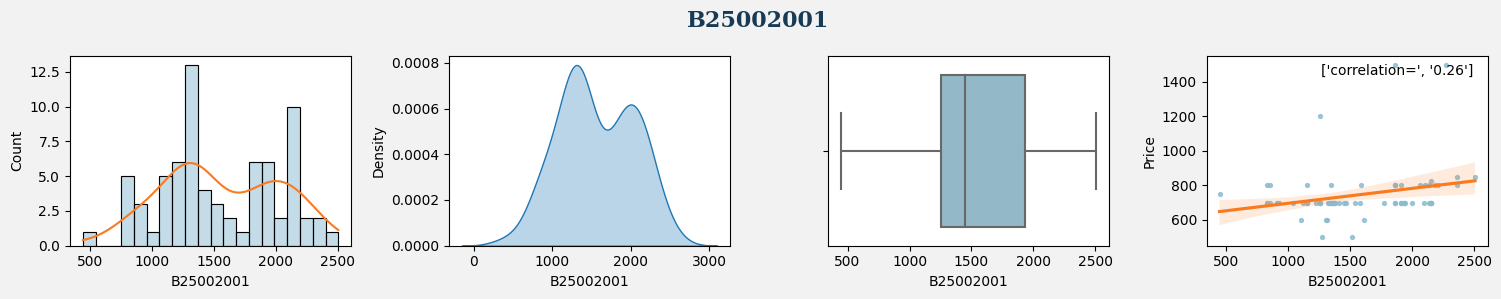

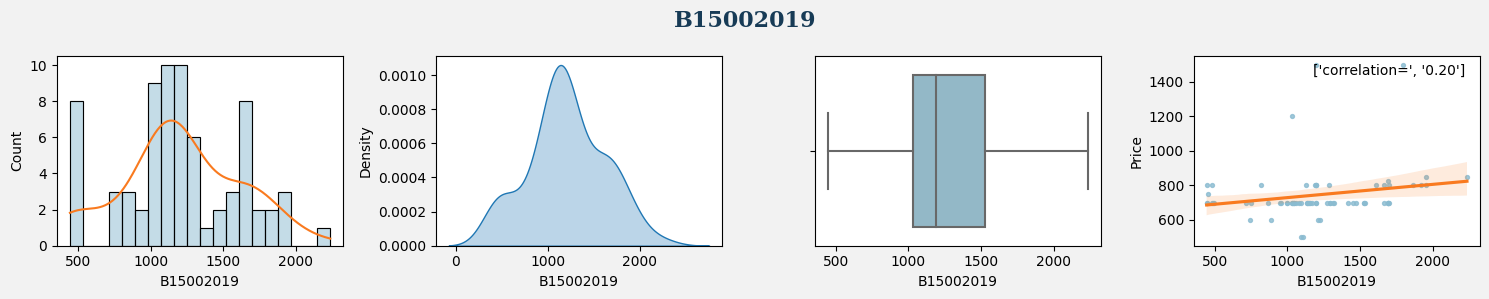

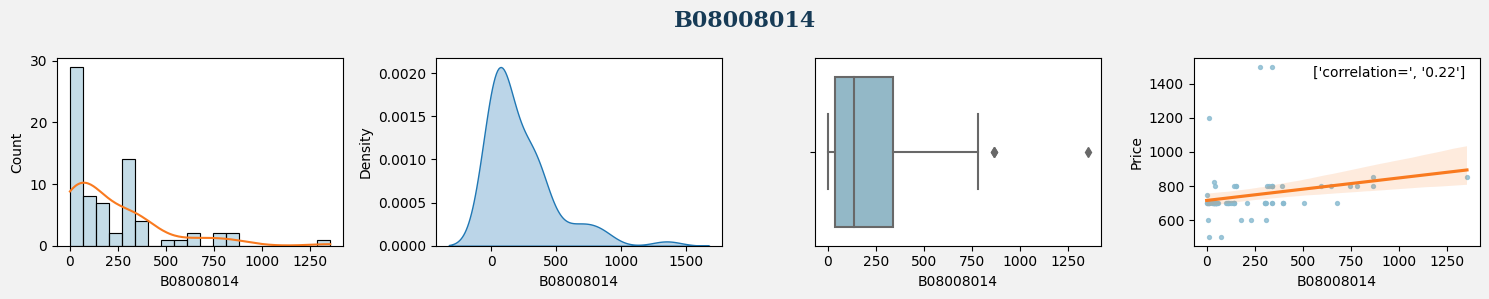

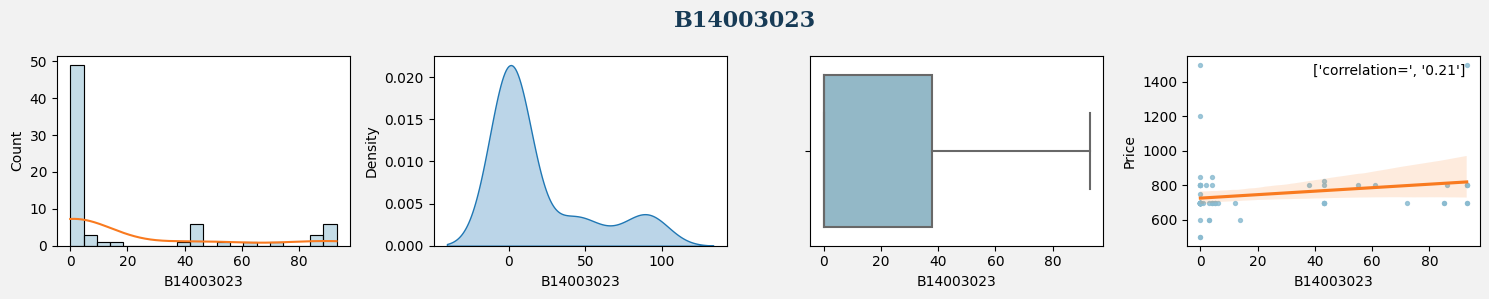

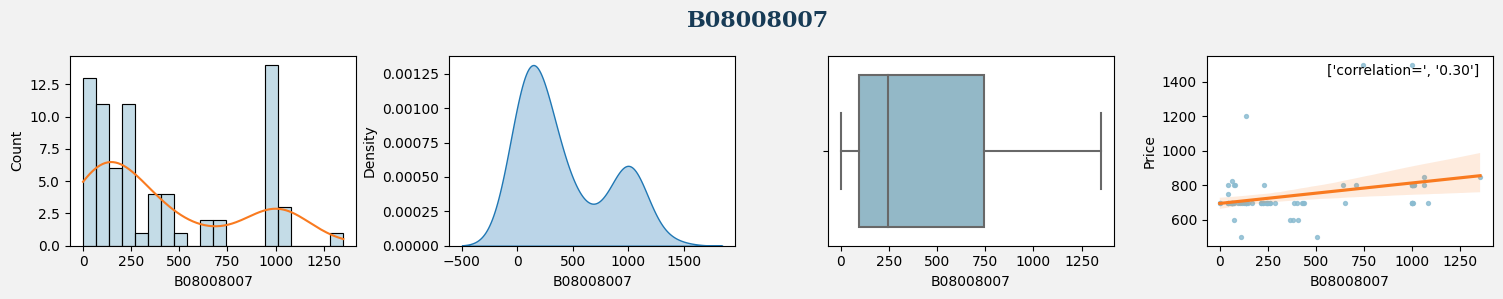

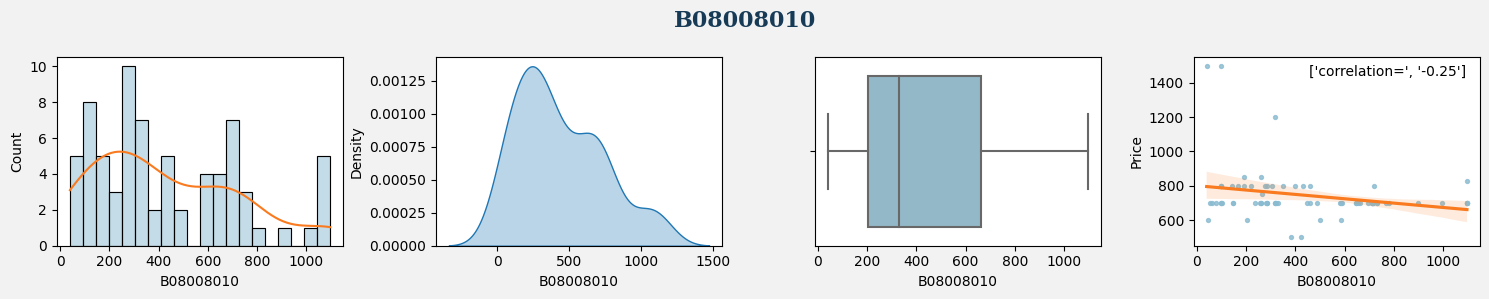

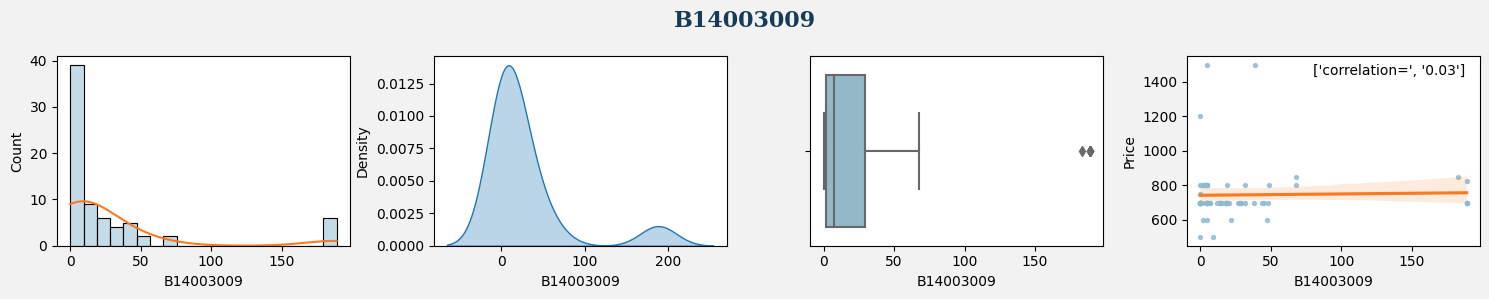

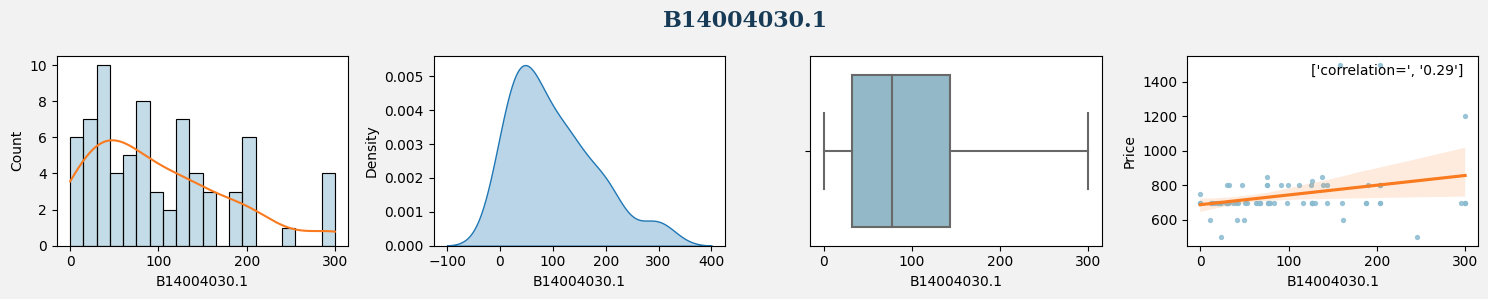

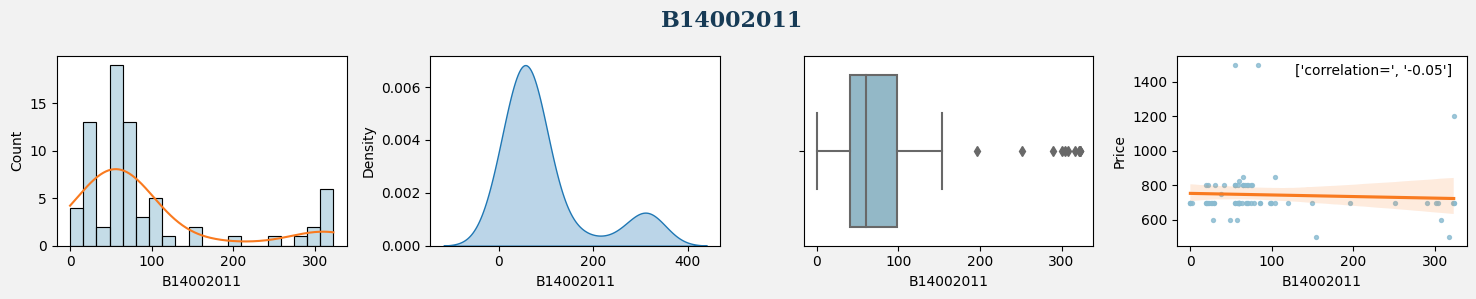

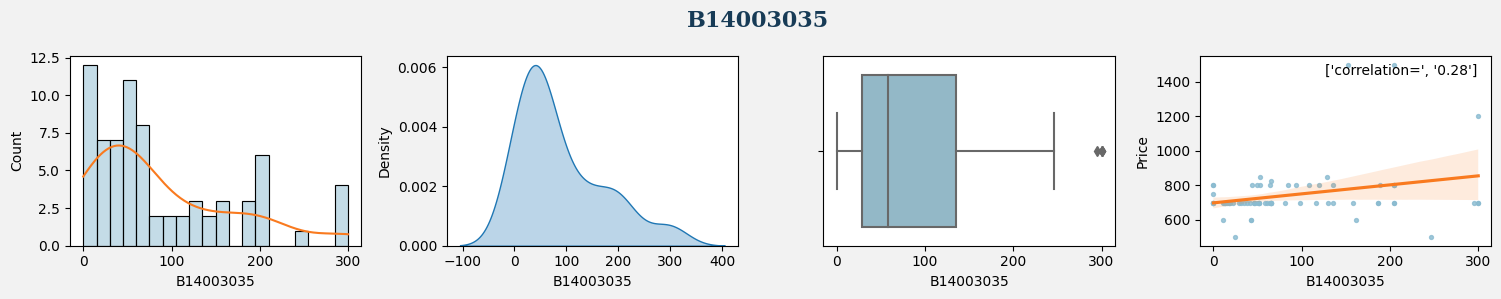

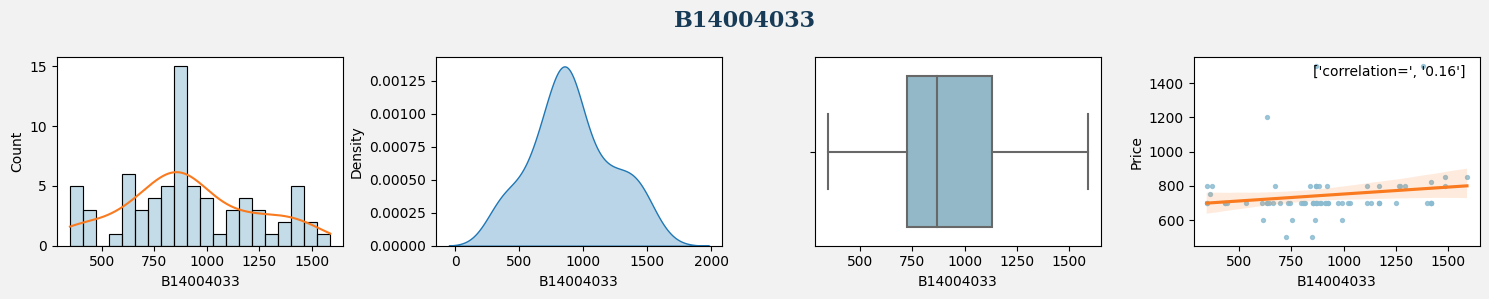

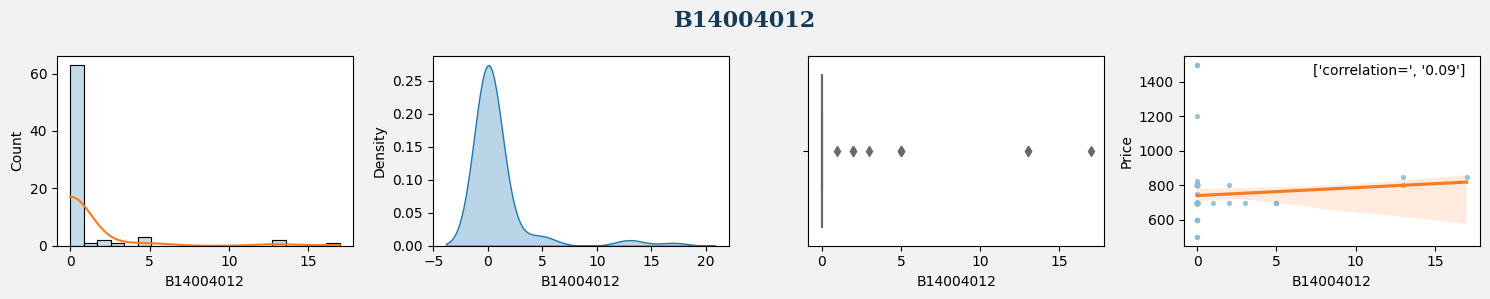

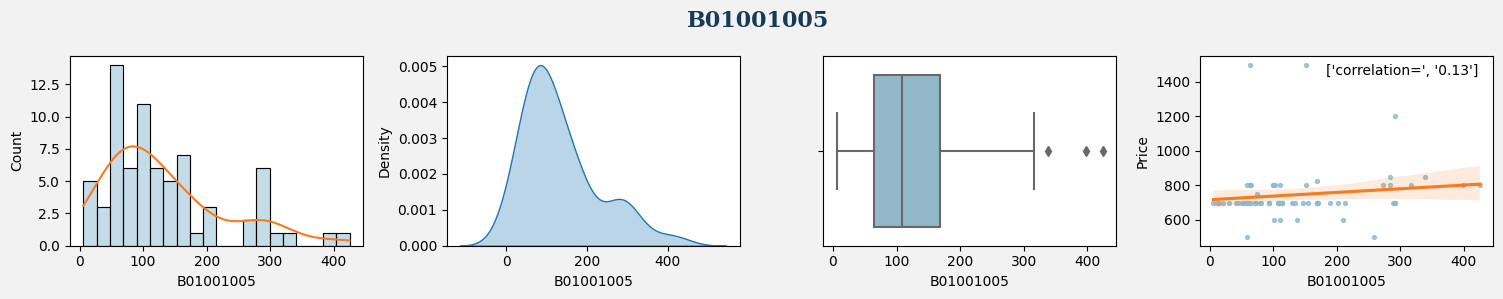

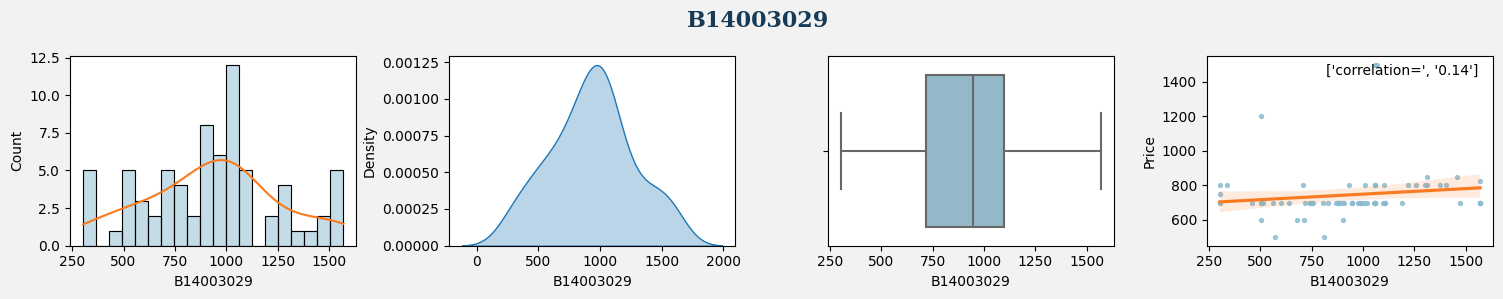

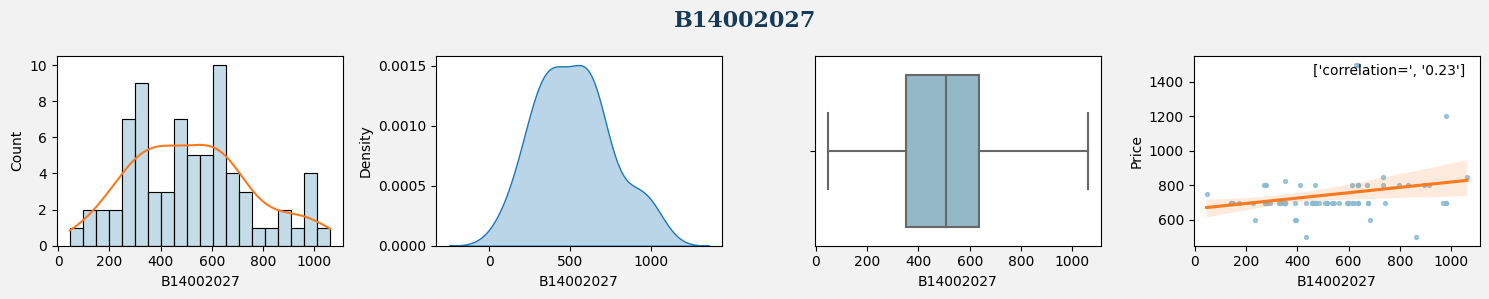

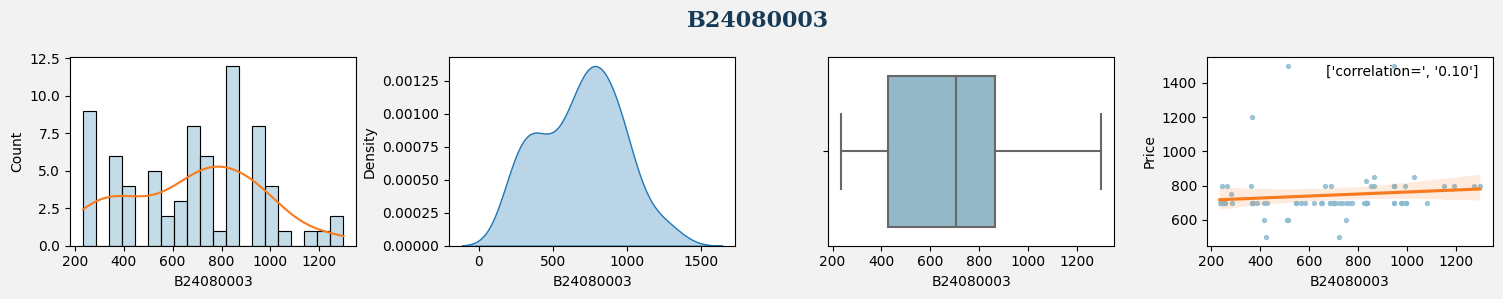

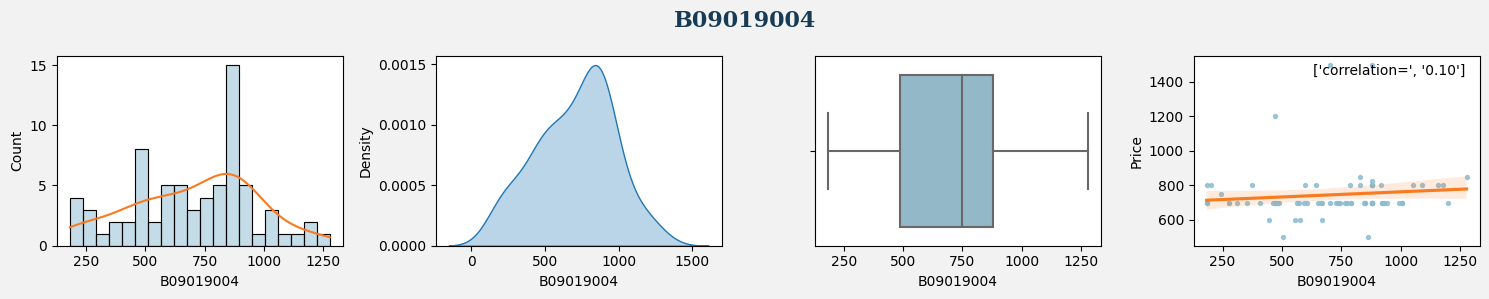

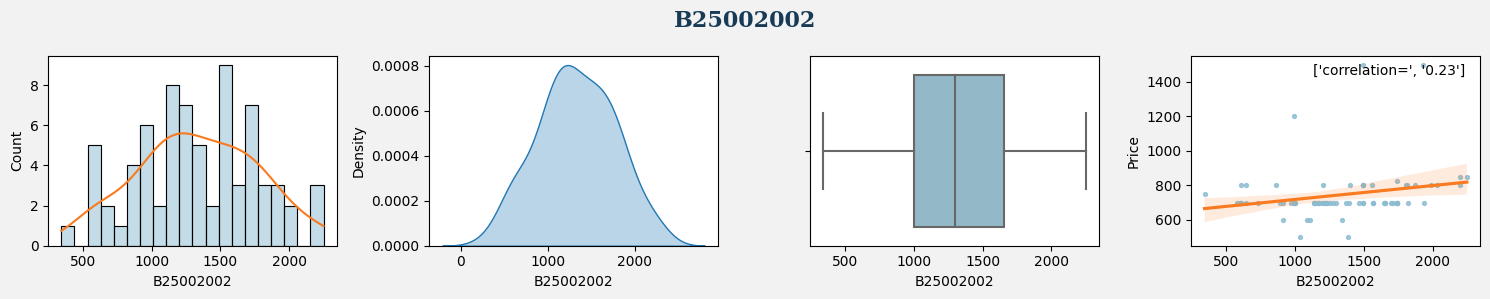

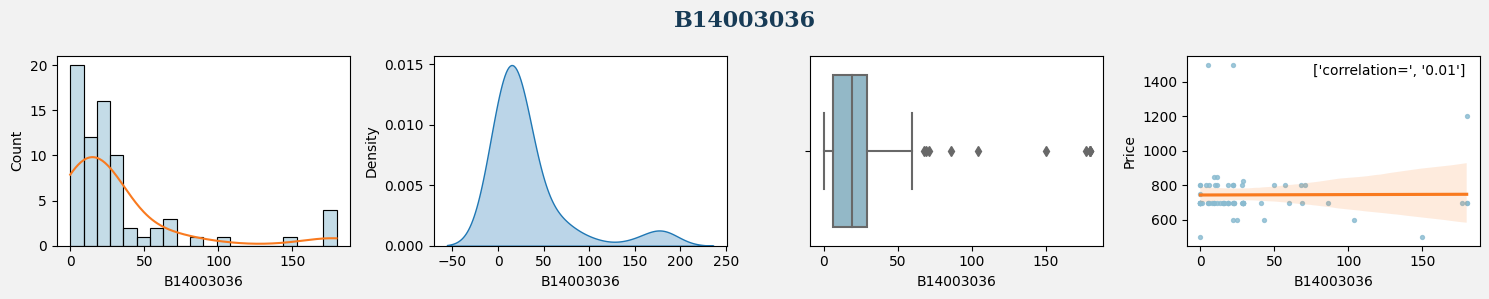

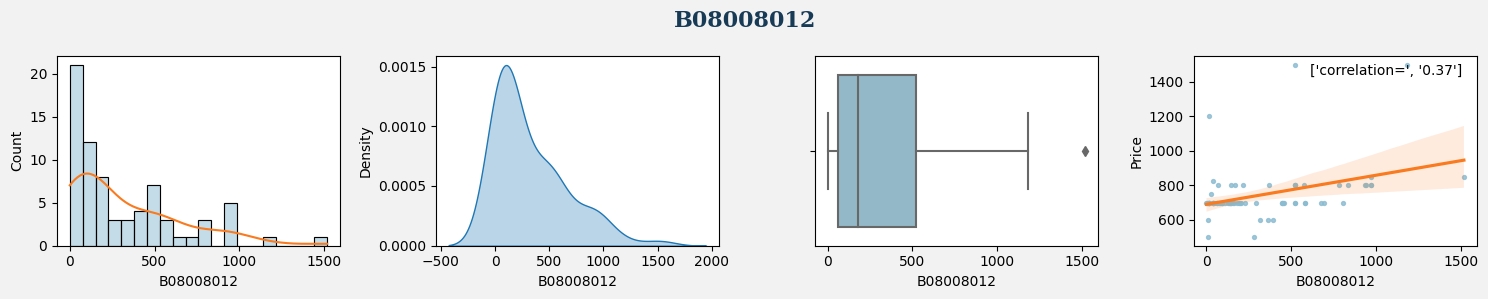

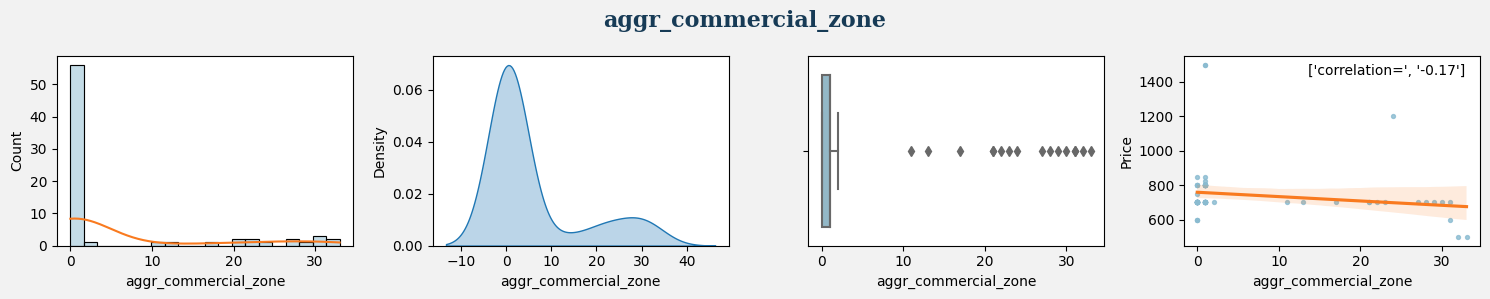

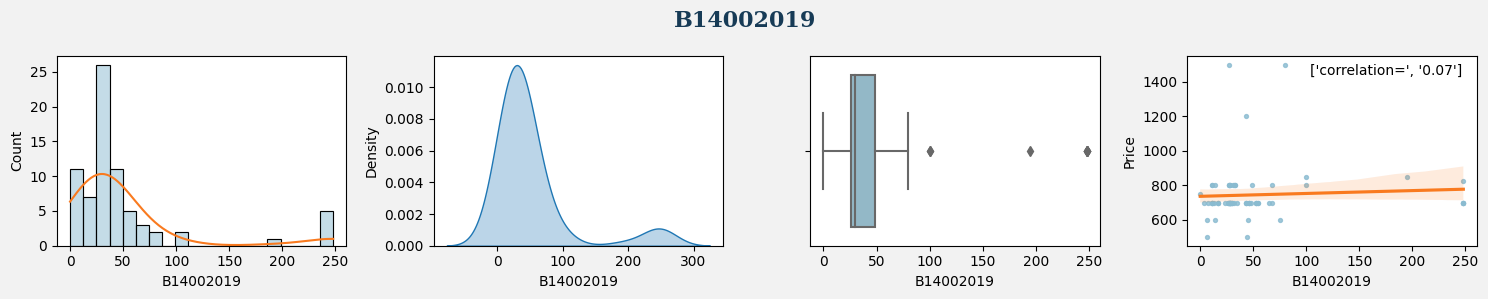

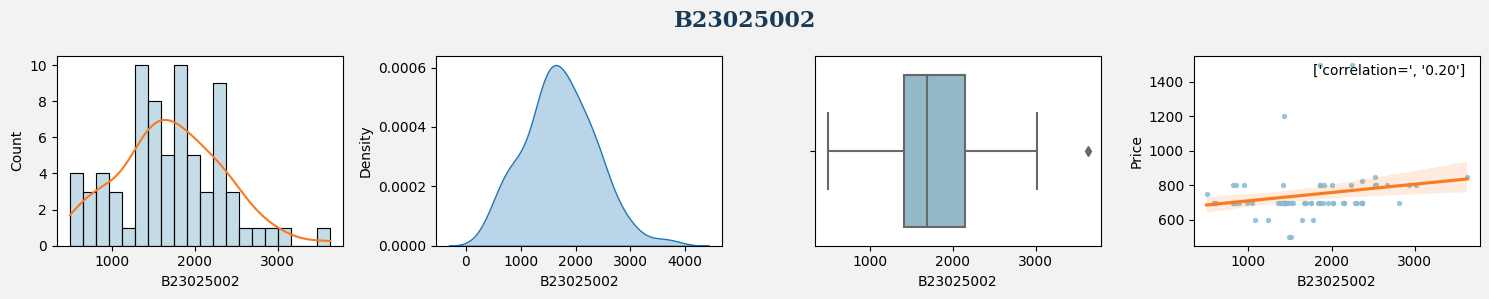

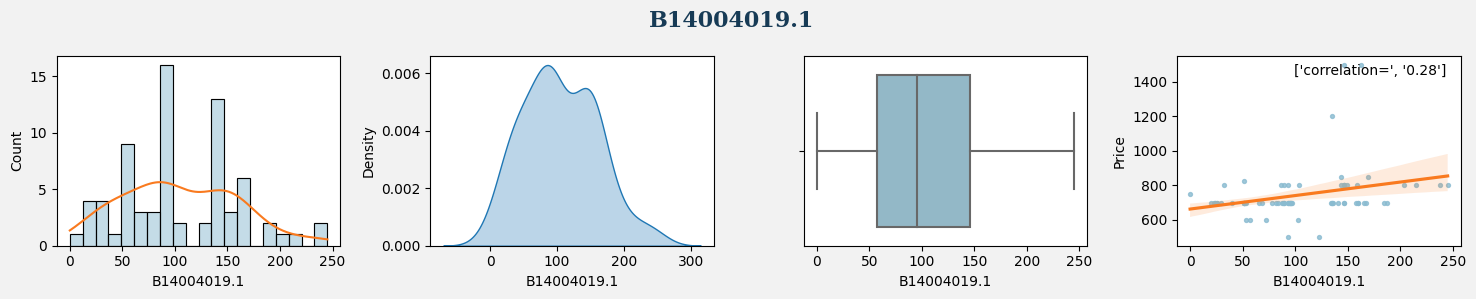

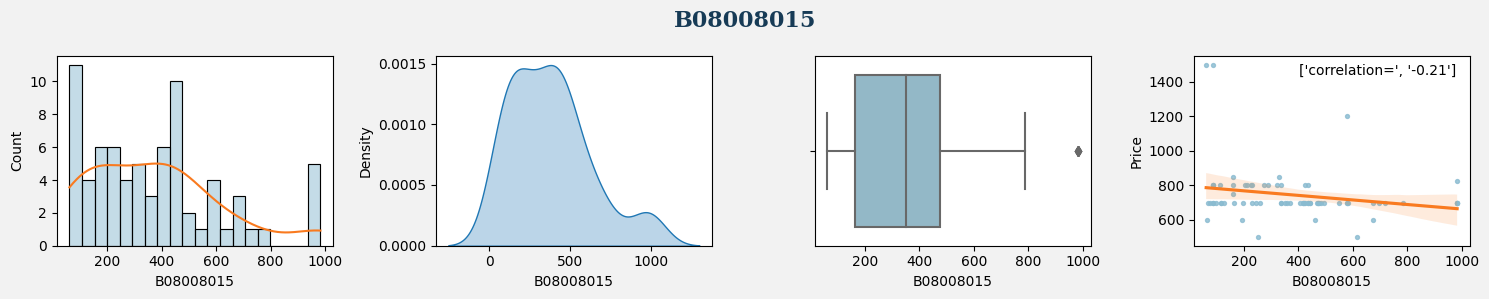

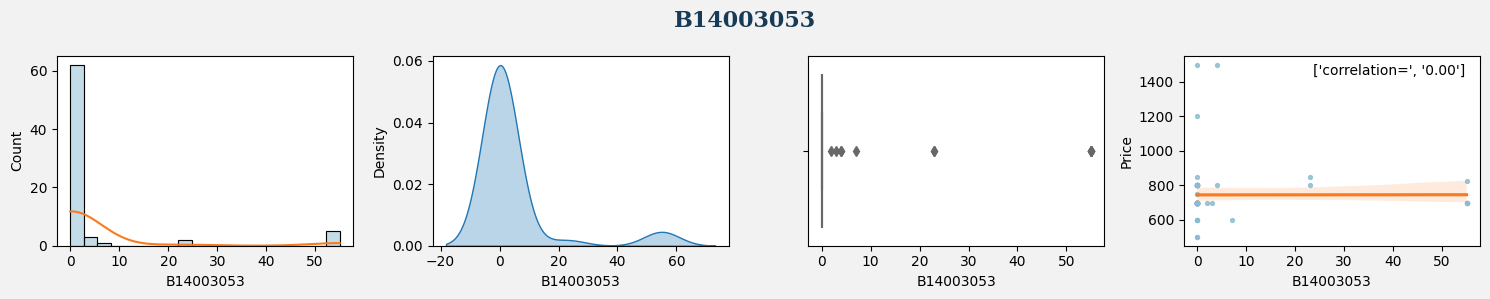

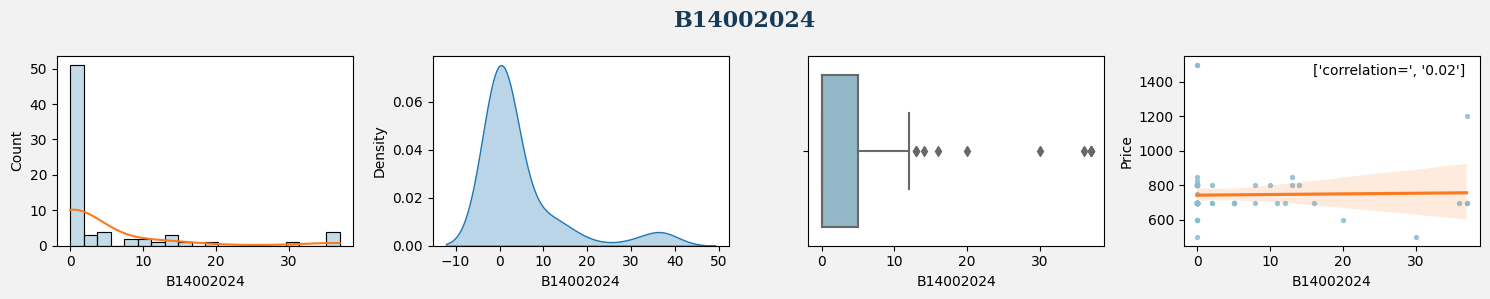

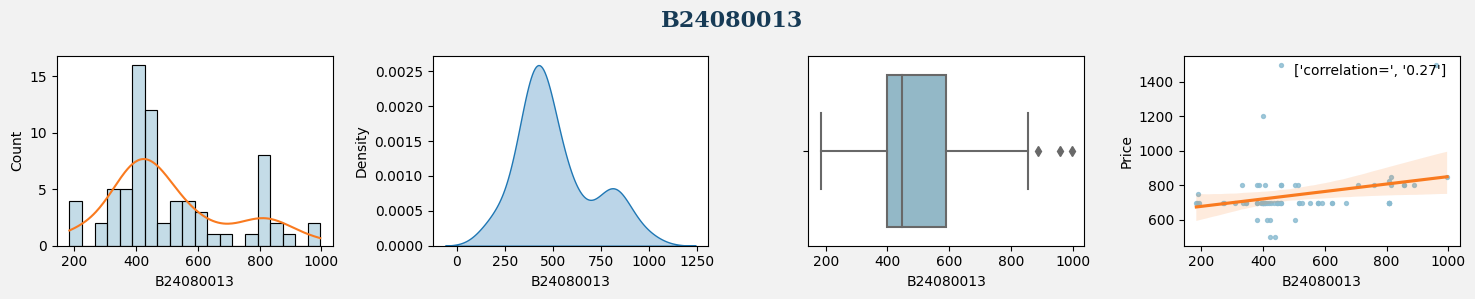

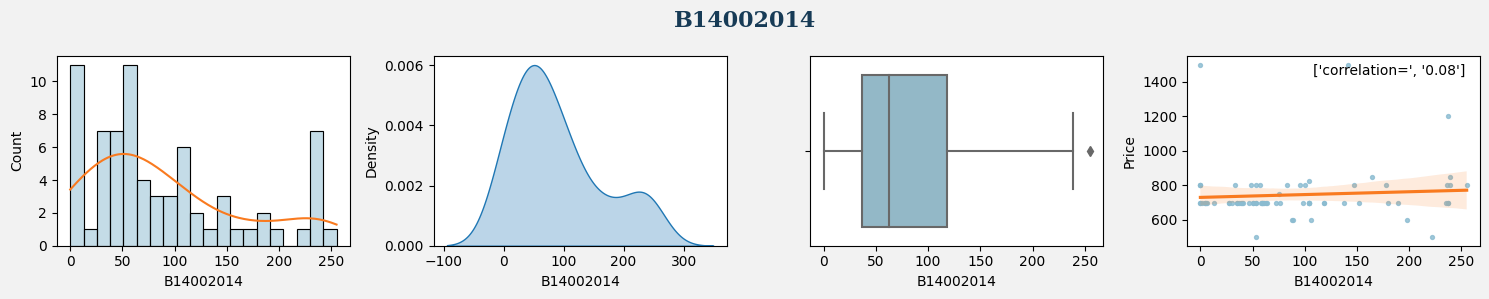

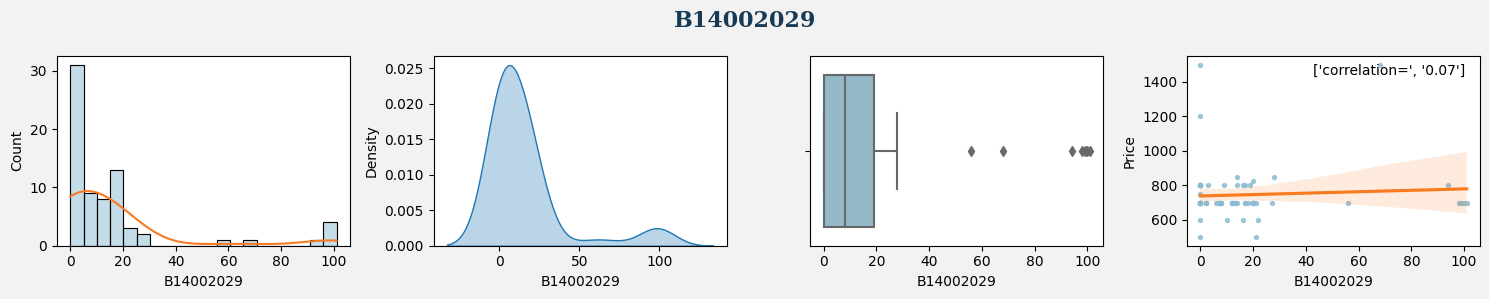

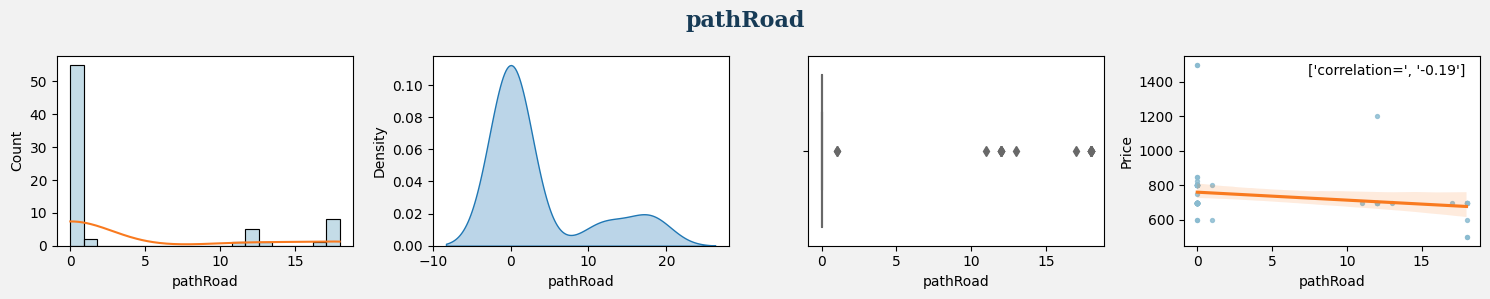

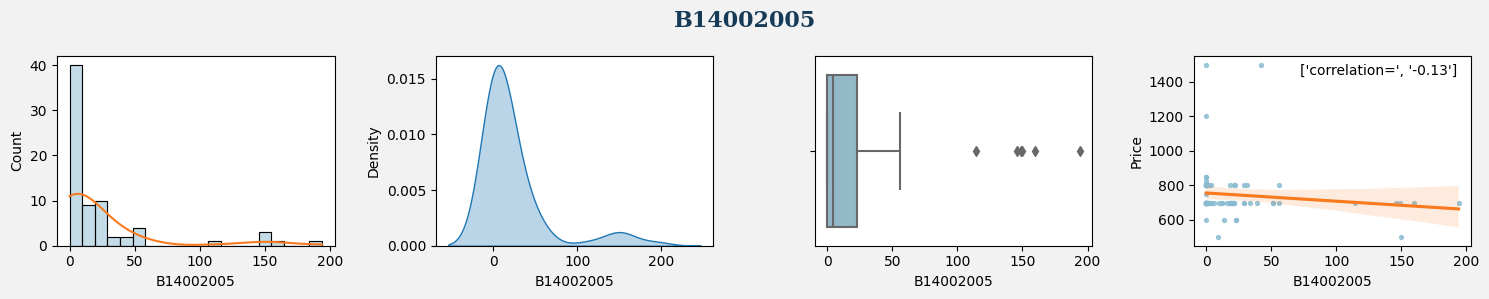

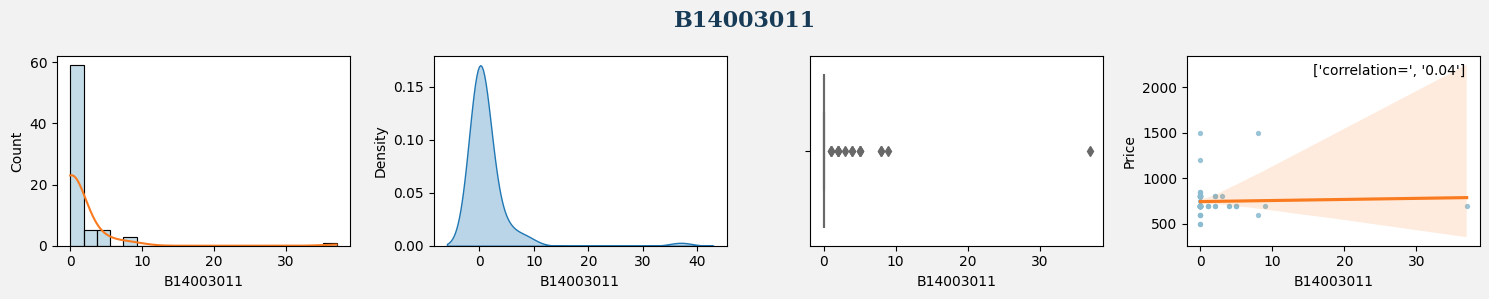

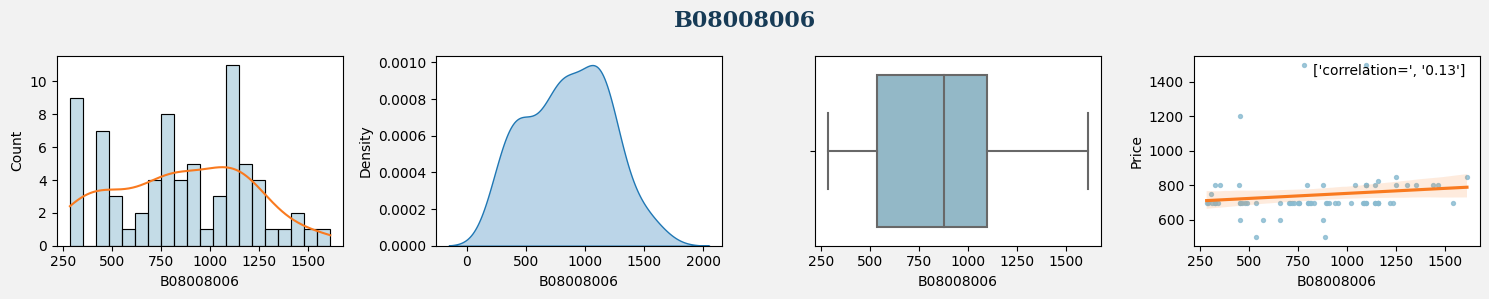

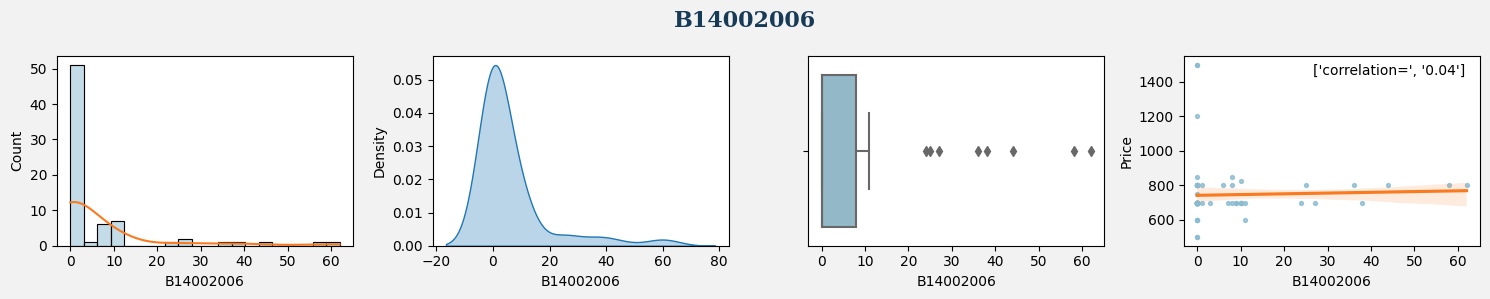

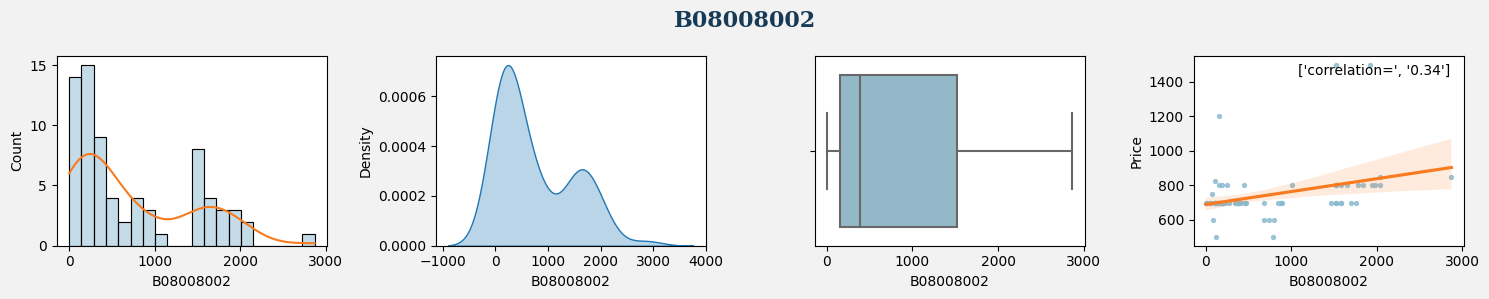

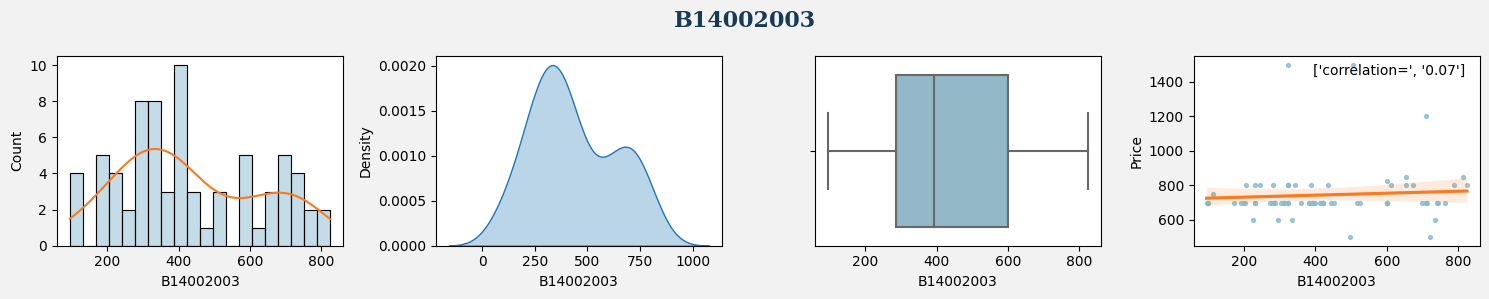

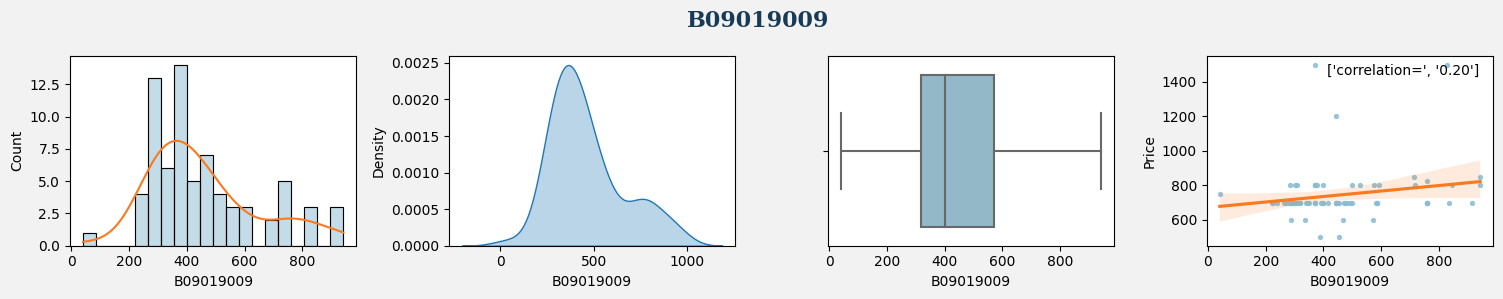

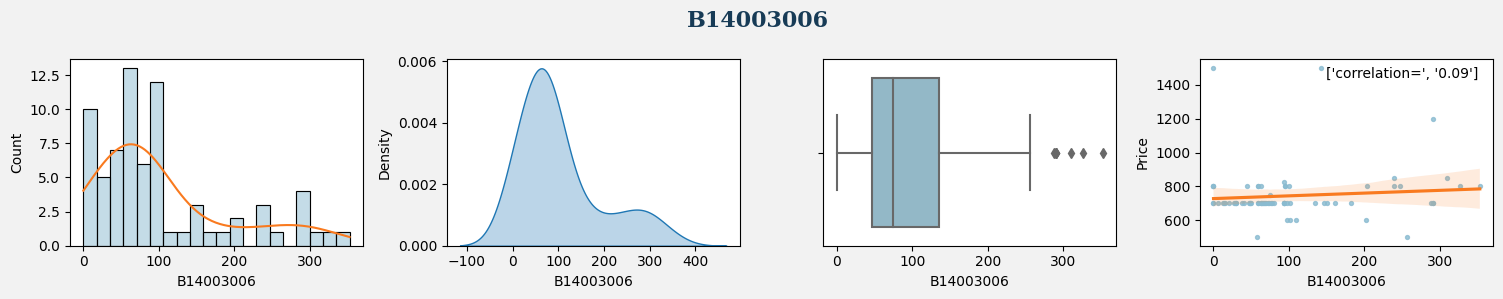

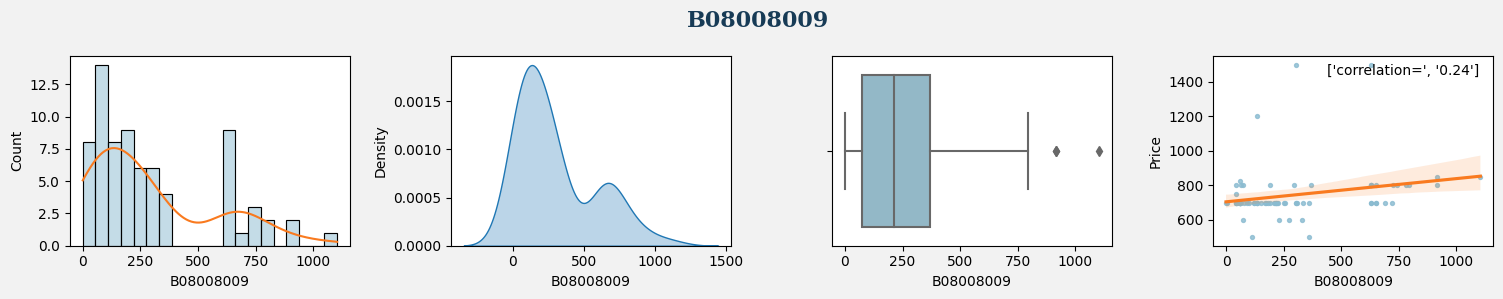

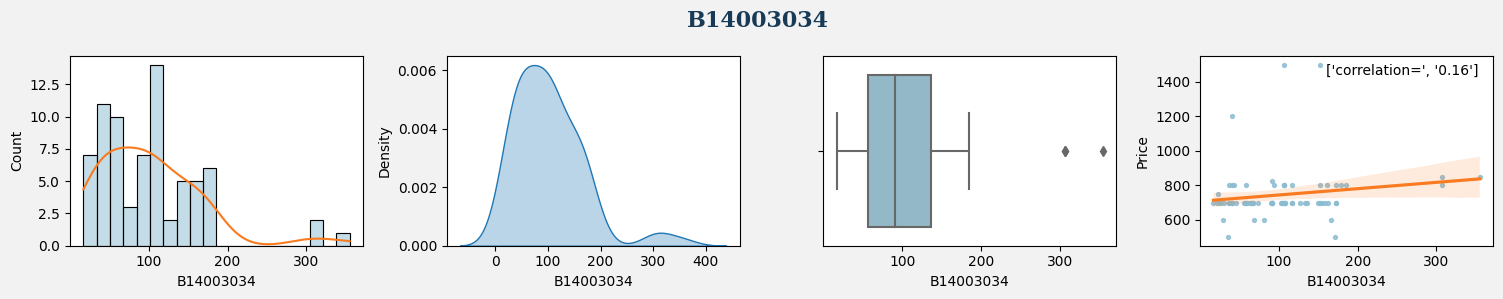

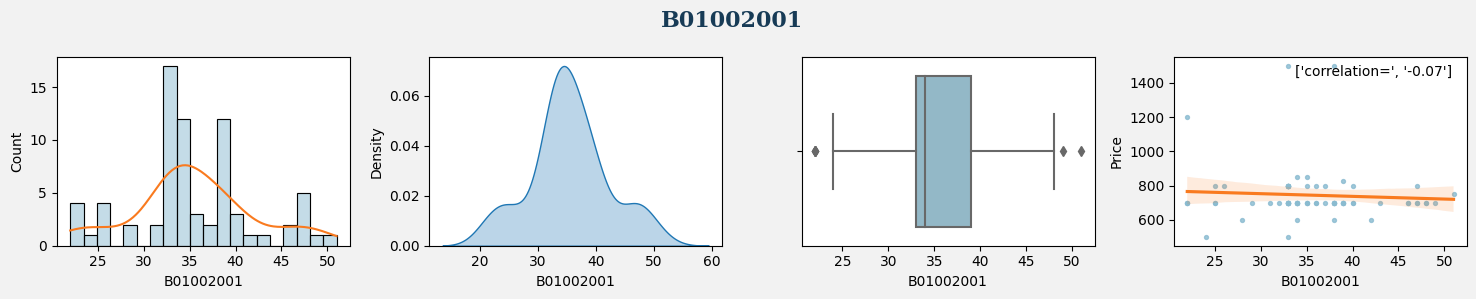

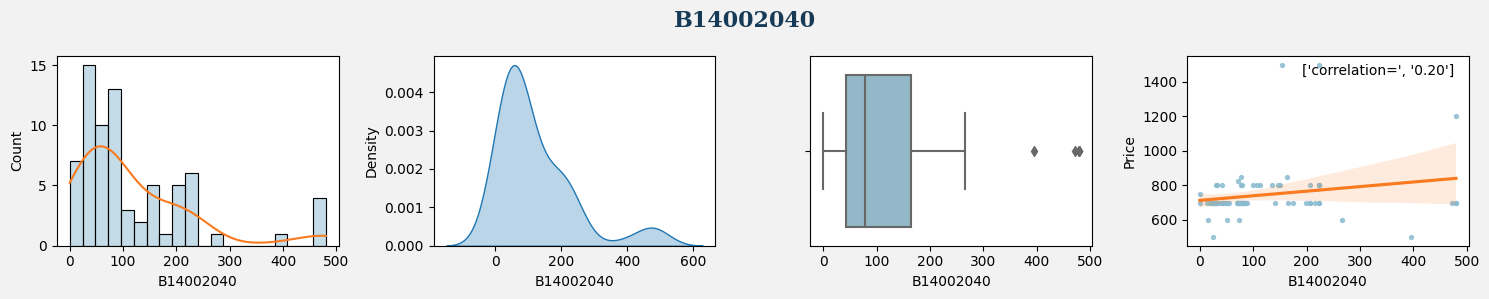

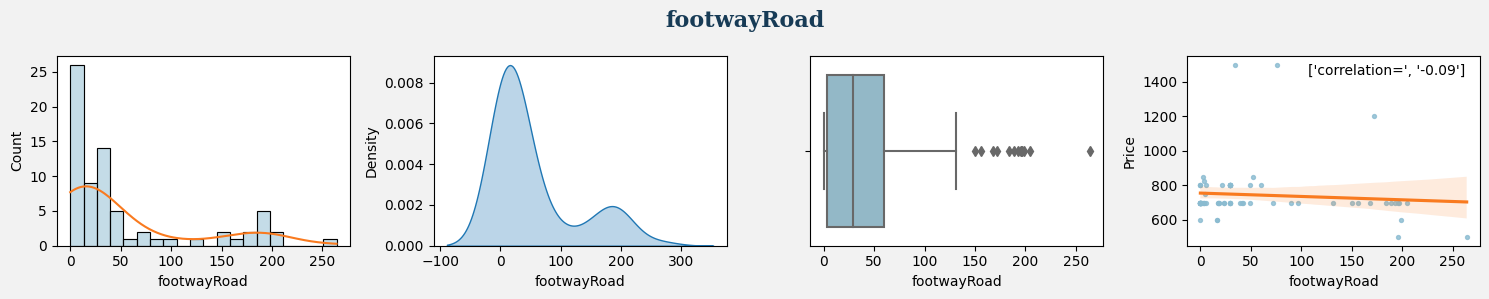

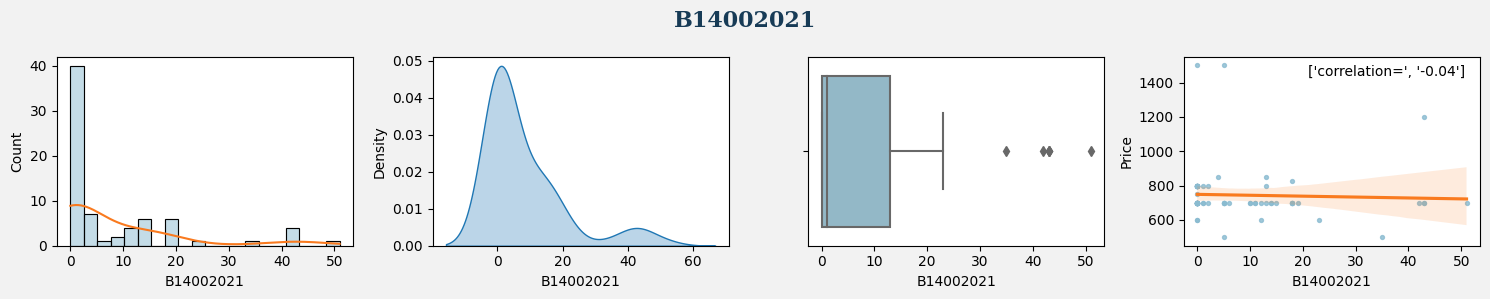

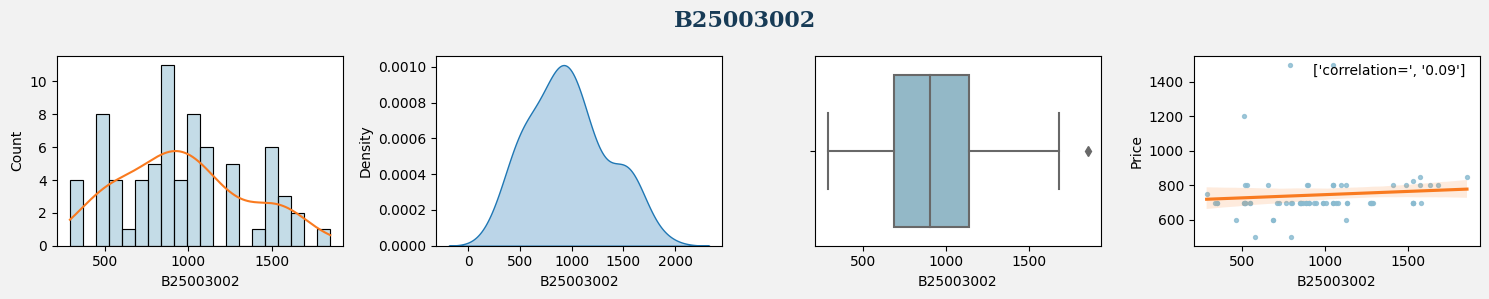

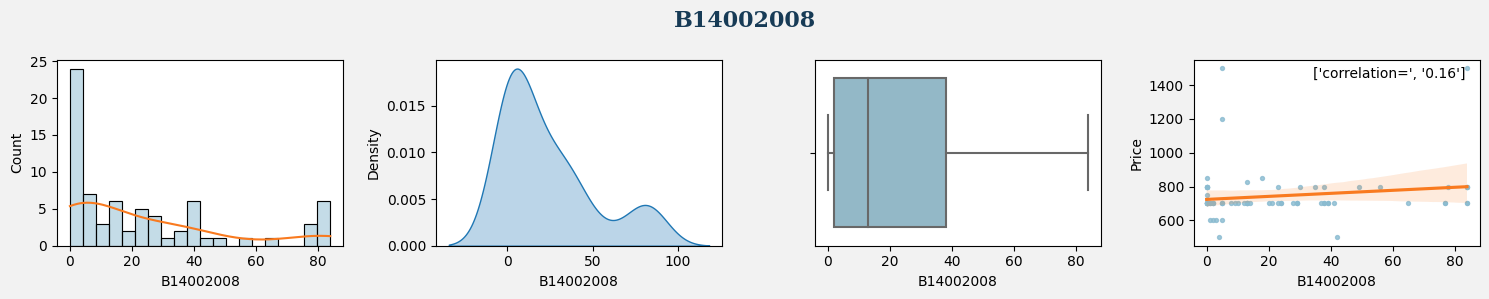

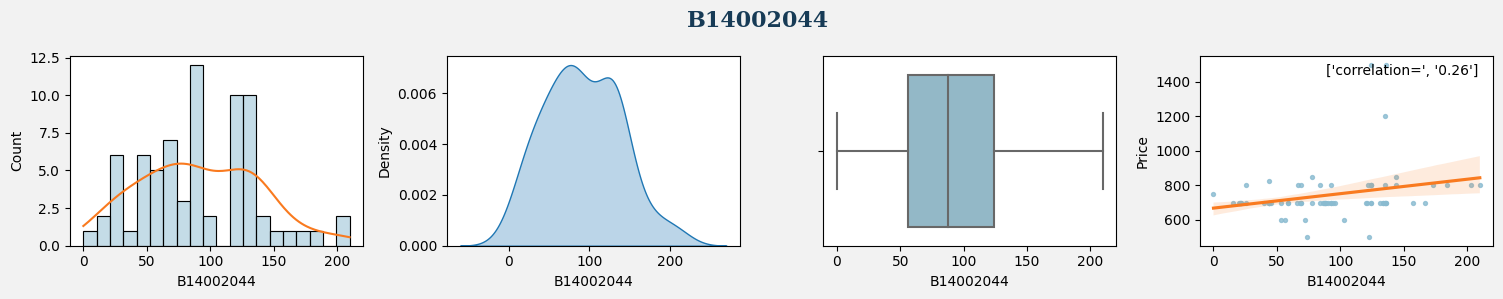

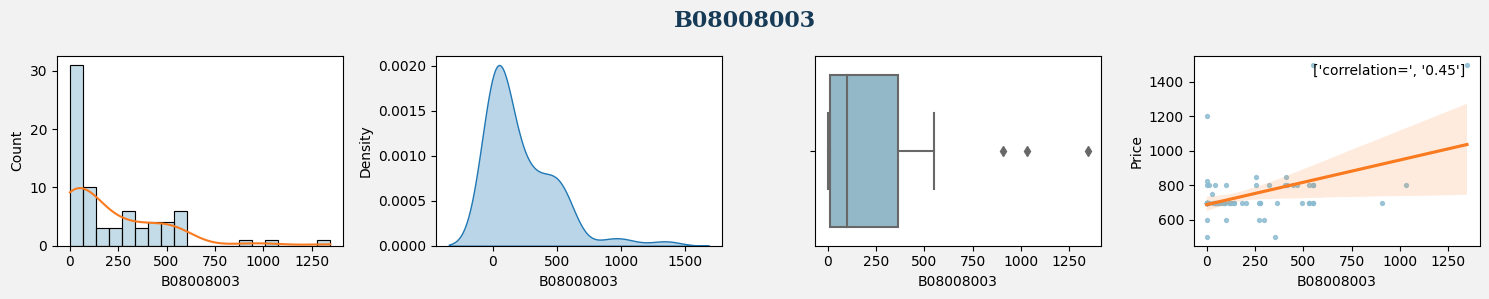

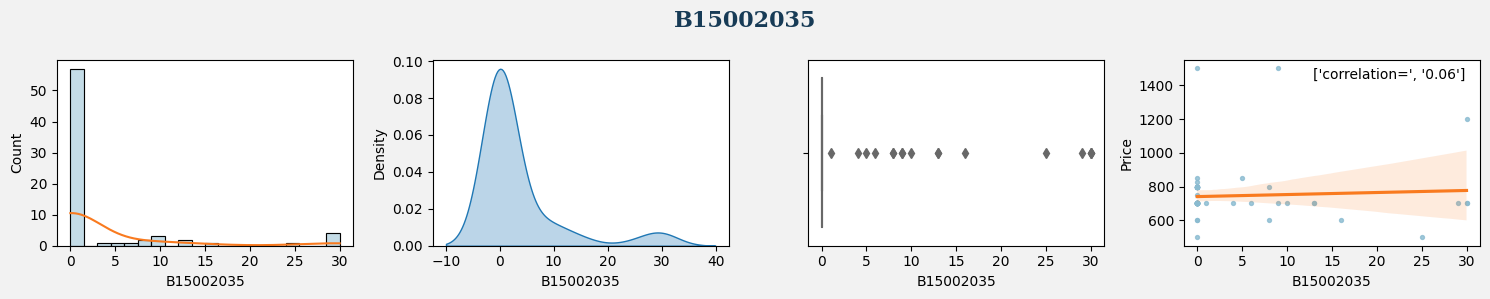

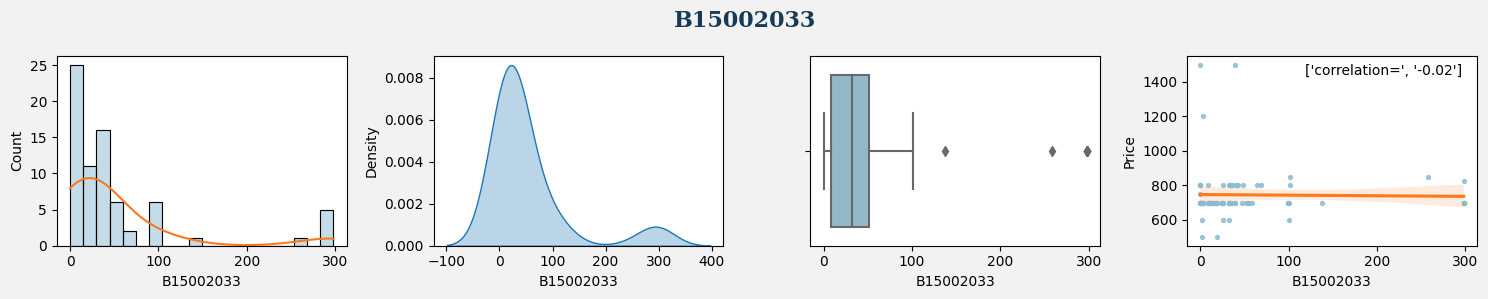

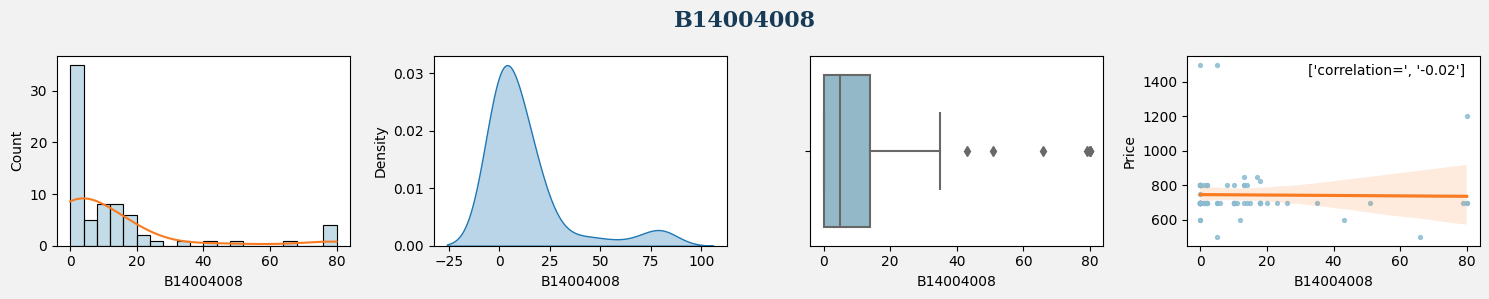

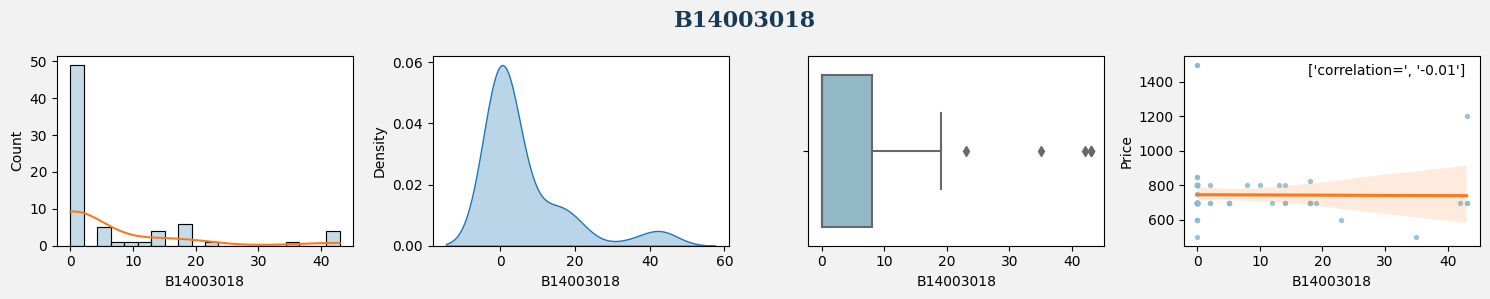

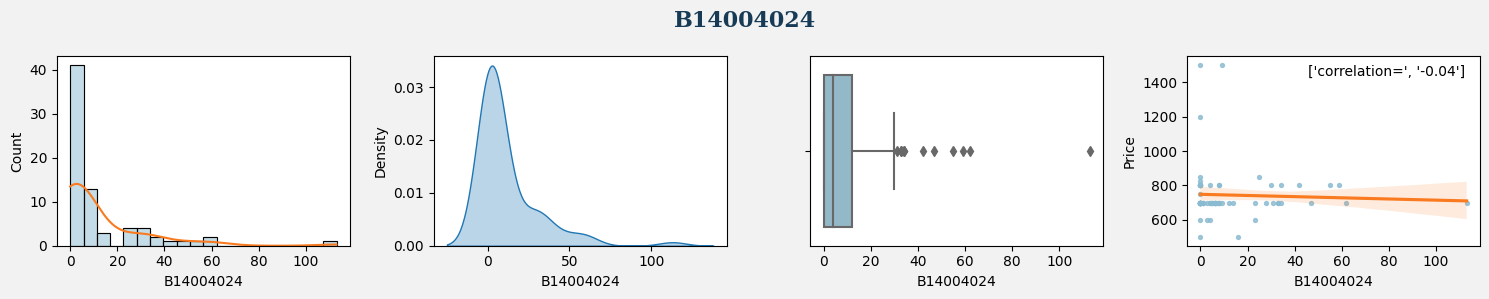

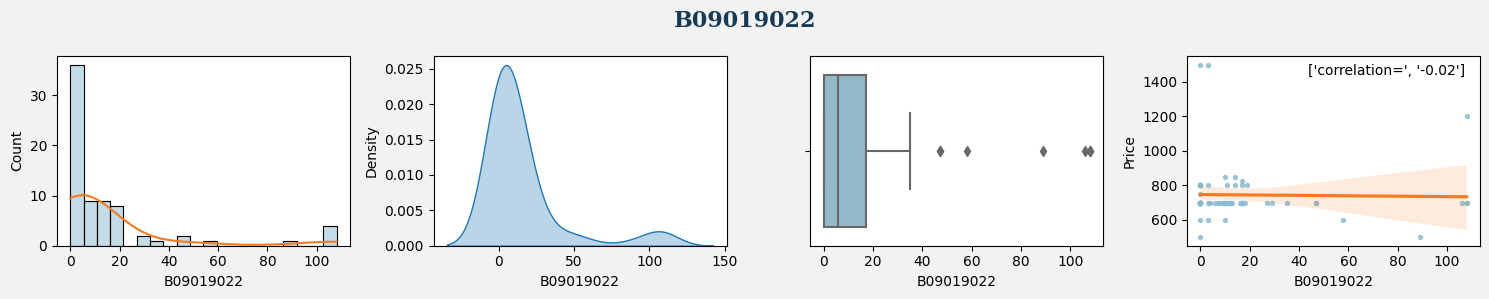

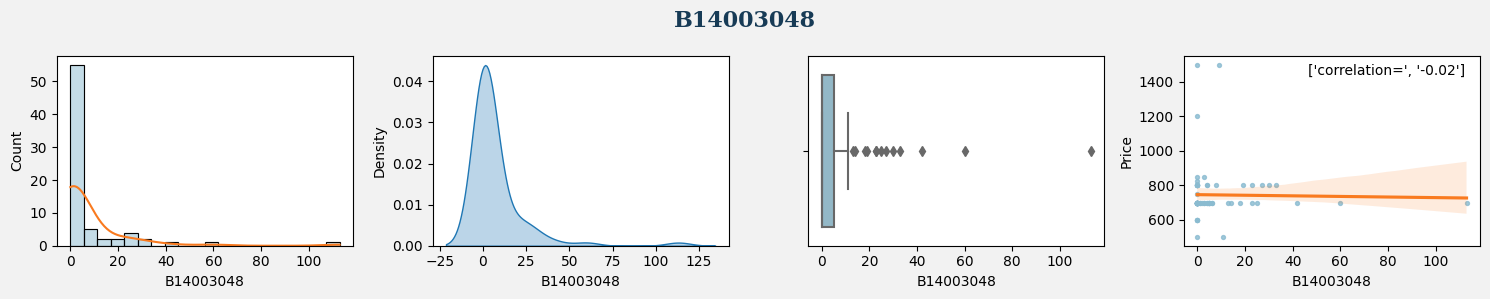

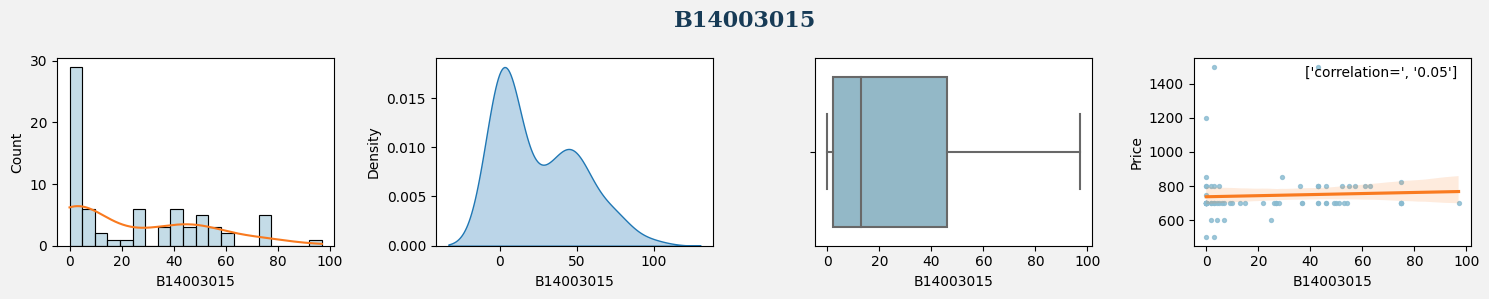

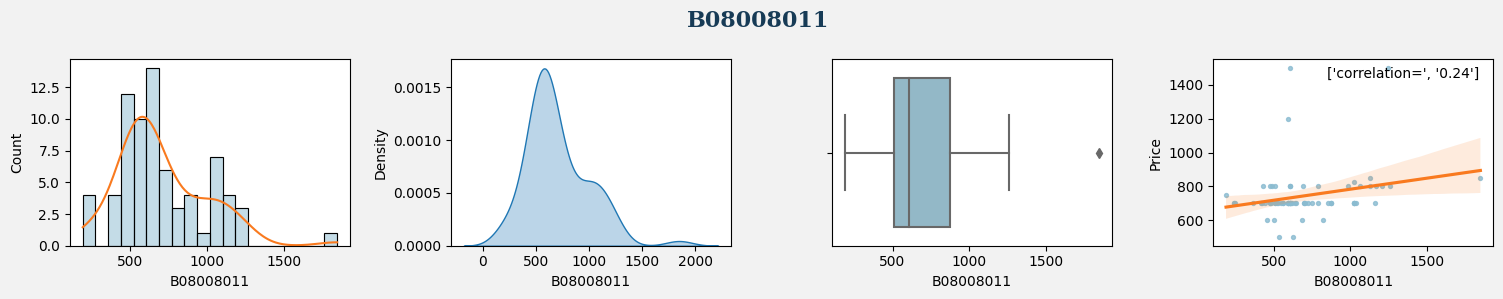

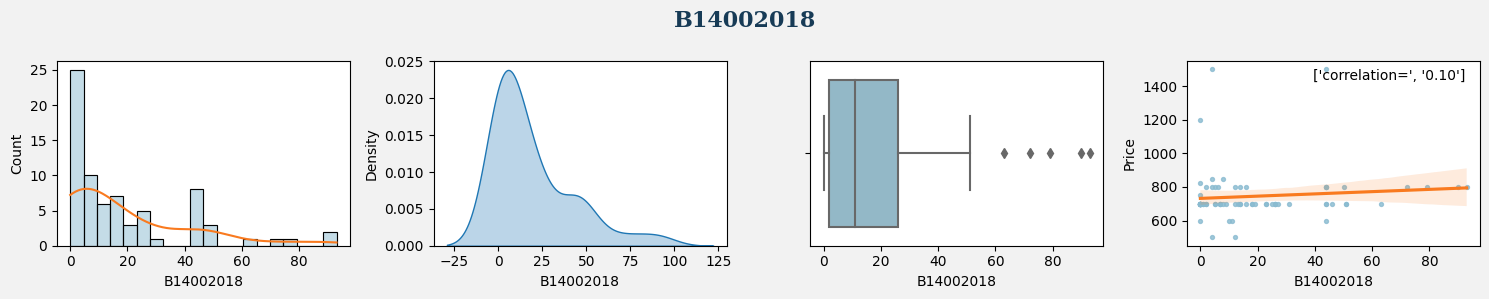

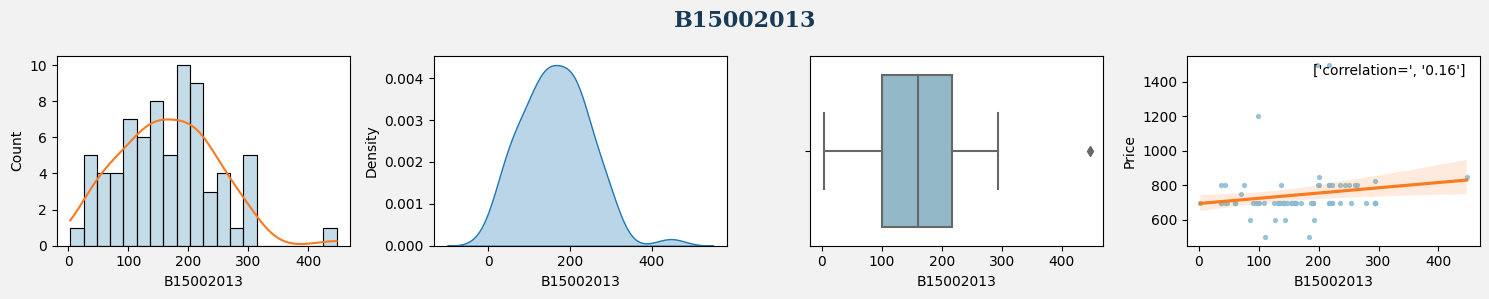

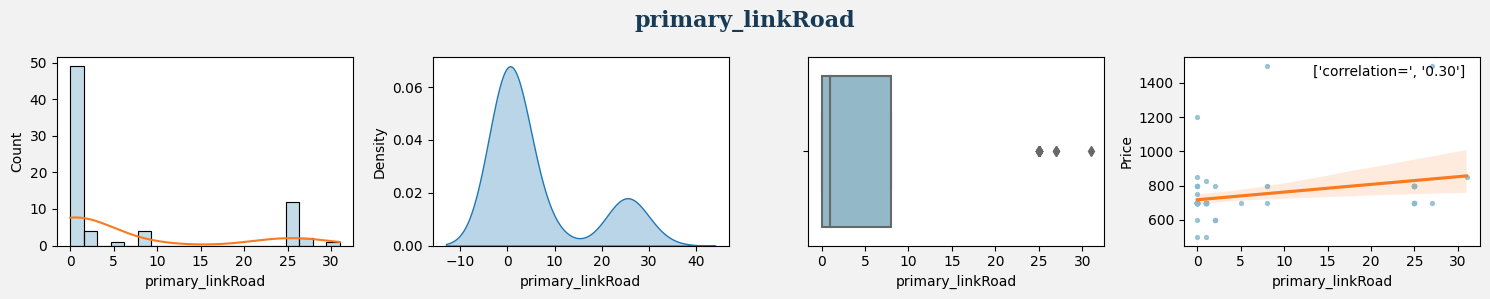

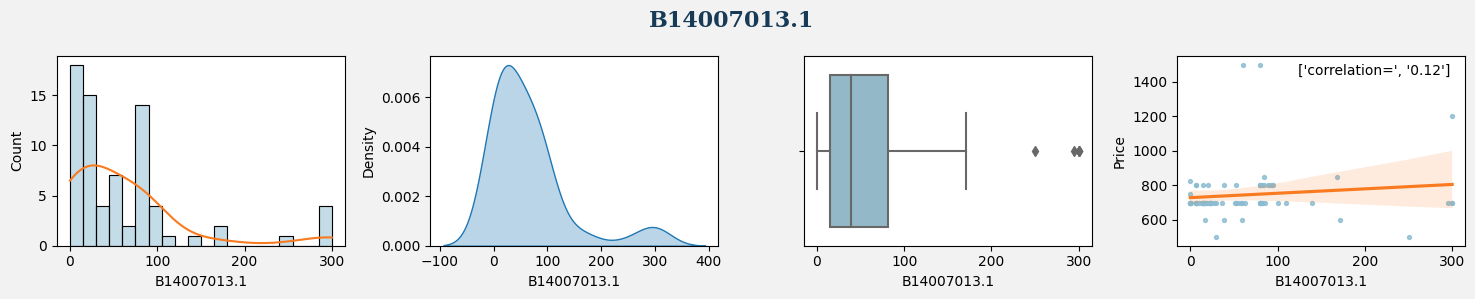

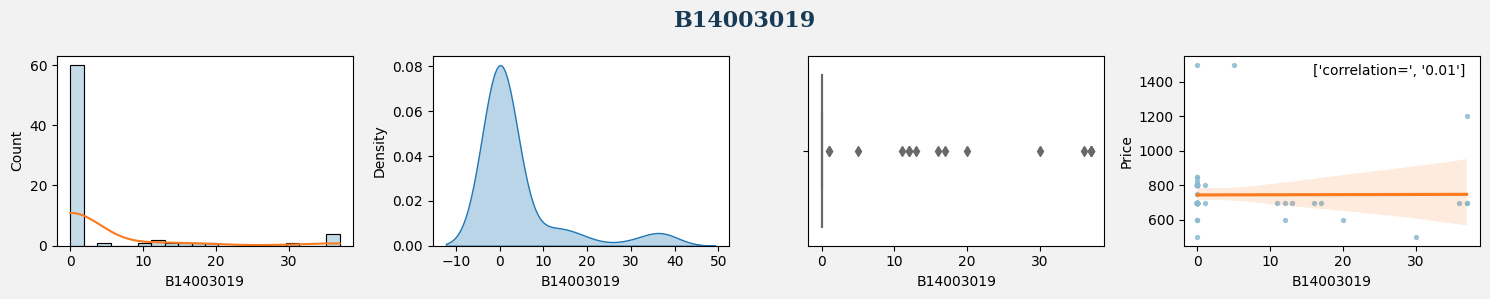

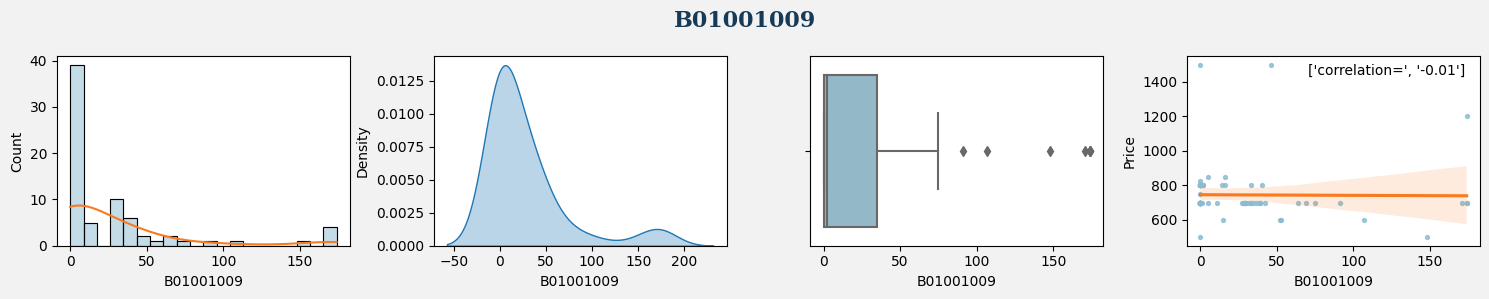

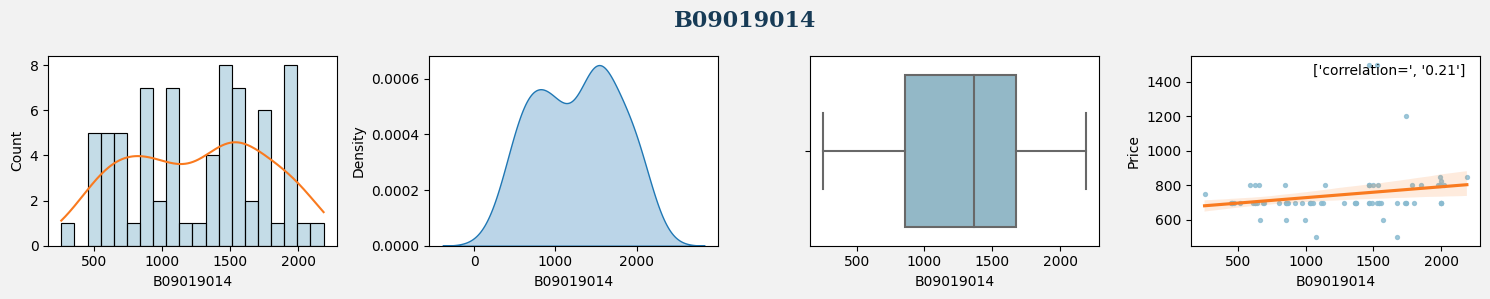

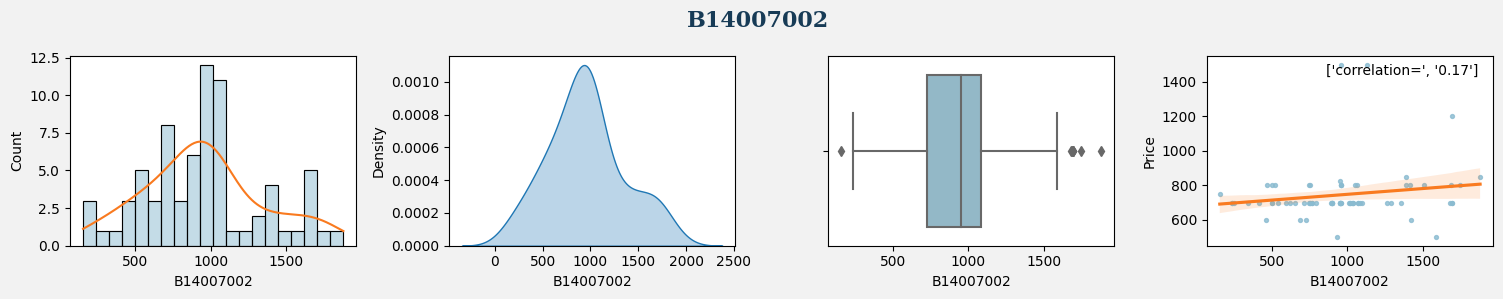

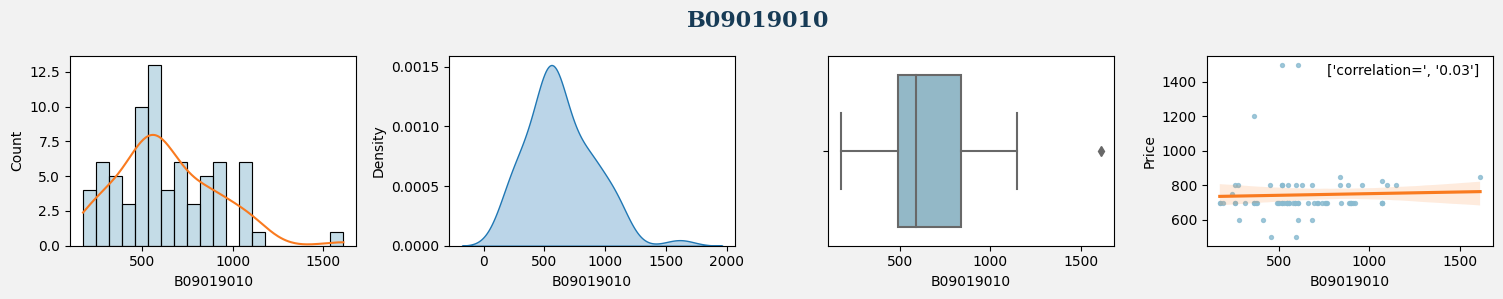

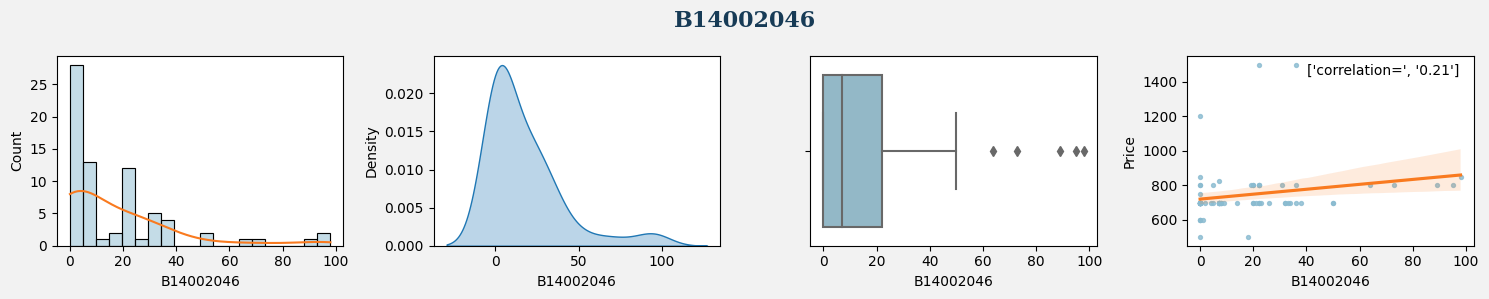

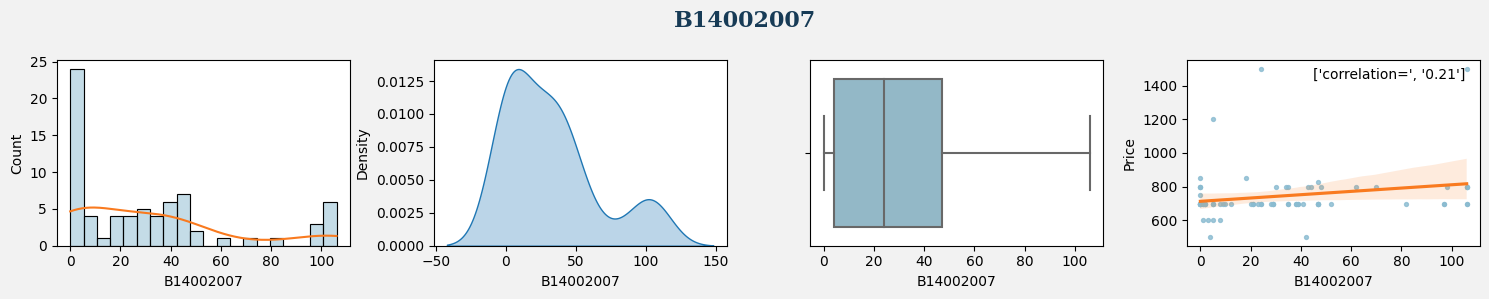

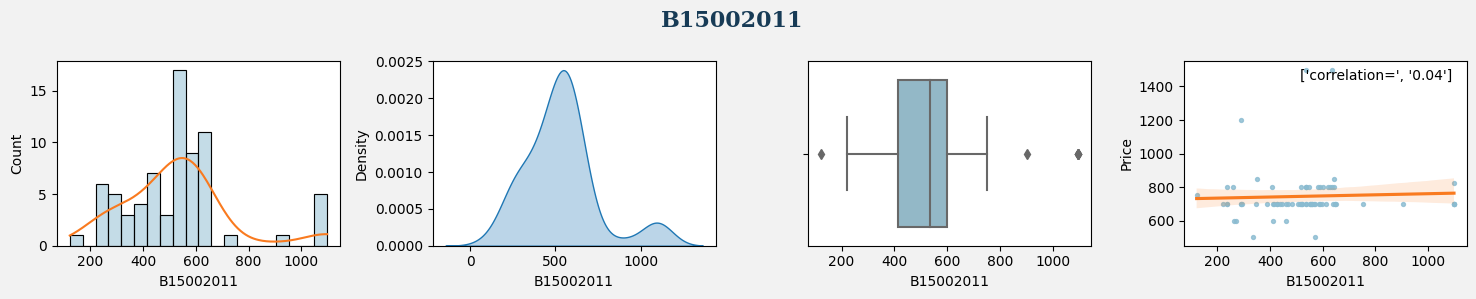

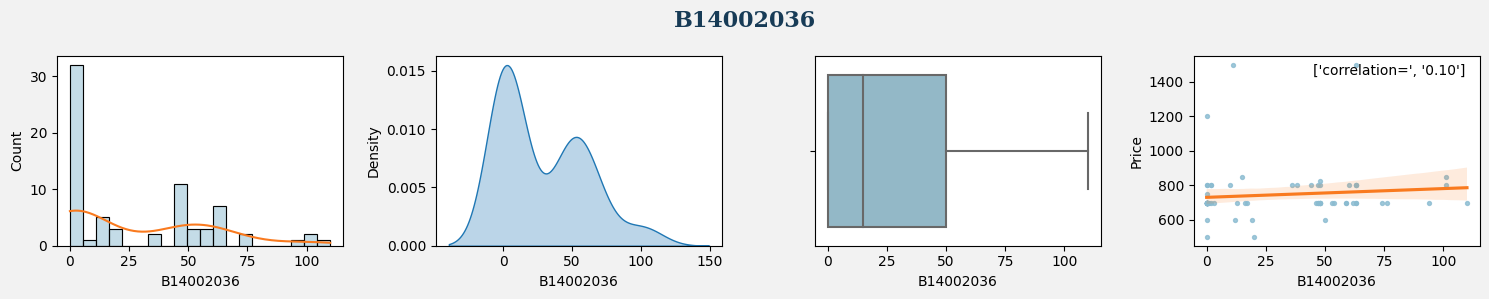

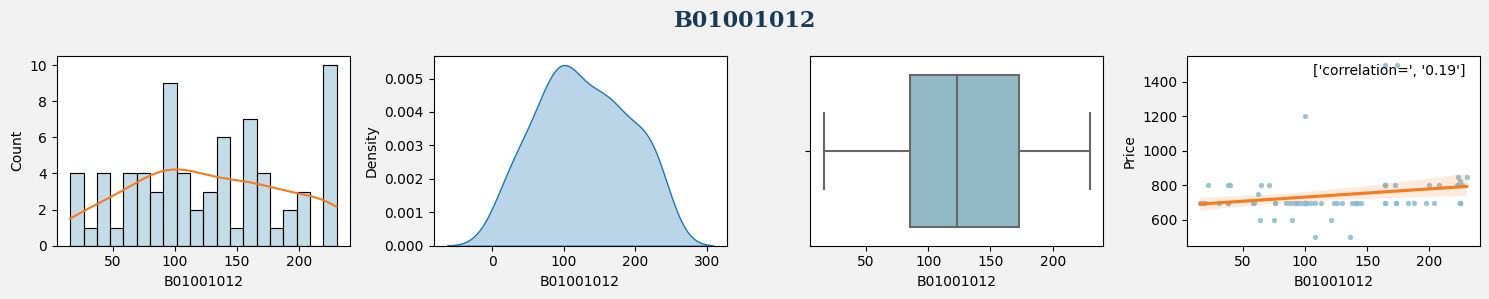

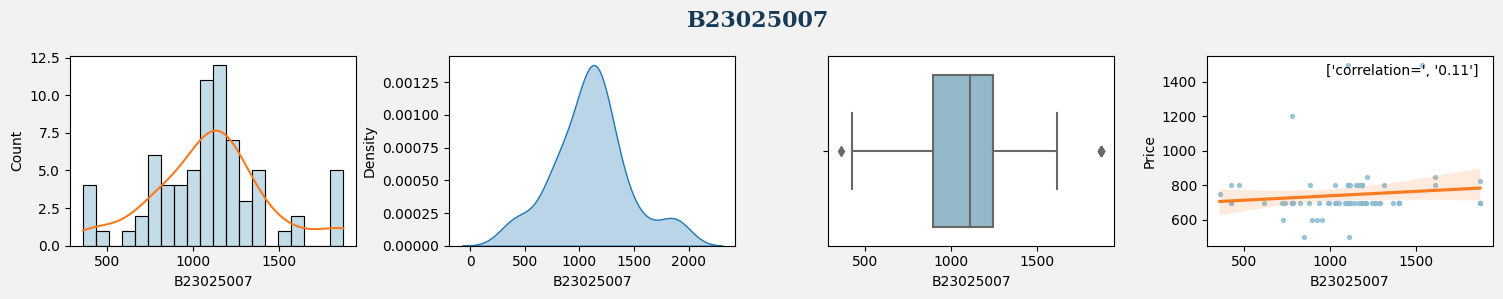

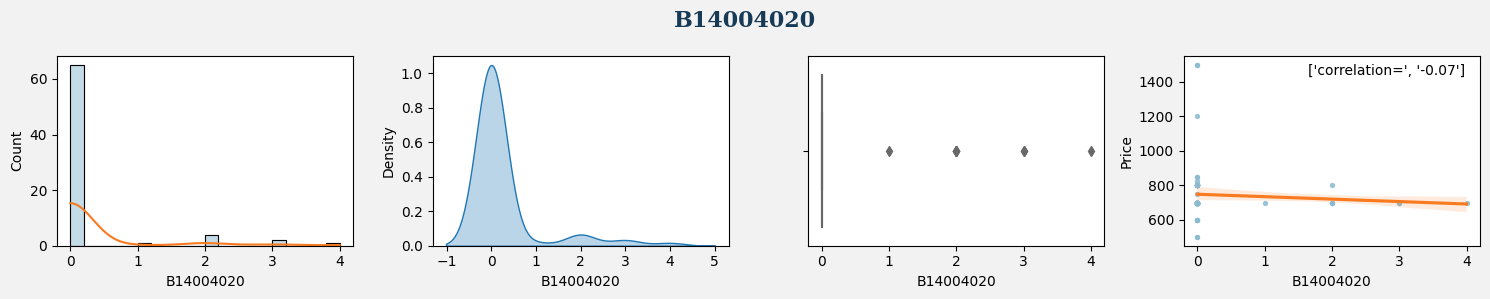

In [11]:
# Plots on numerical features to check data quality and data distribution
num_cols = data_subset.select_dtypes(exclude='object').columns.tolist()[:-1]
color ='#8abbd0'
for feature in num_cols:
    fig, ax = plt.subplots(1,4, figsize=(15,3))
    fig.patch.set_facecolor( '#F2F2F2')
    sns.histplot(data_subset[feature], bins=20, ax=ax[0],  color=color, kde=True)
    ax[0].lines[0].set_color('#F97A1F')
    sns.kdeplot(data_subset[feature], ax=ax[1], shade=True, alpha=0.3)
    sns.boxplot(x=data_subset[feature], data=data_subset,ax=ax[2], color=color)
    
    sns.regplot(x=data_subset[feature], y='Price', data=data_subset, ax=ax[3], color=color, scatter_kws={"s": 8}, line_kws={'color':'#F97A1F'})
    correlation = np.corrcoef(data_subset['Price'], data_subset[feature])[0][1]
    ax[3].text(x=0.95, y=0.9, 
               s = ['correlation=', "{:.2f}".format(correlation)], 
               ha='right', transform=ax[3].transAxes)
            
    plt.suptitle(feature, fontfamily='serif', fontsize=16, color='#173b56', fontweight='bold')
    plt.tight_layout()

## We have plotted charts to show:
### features distribution (the hist plot and kde plot),
### feature statistics (the box plot) 
### and its relationship with price (the scatter plot).
### We will examine each numerical feature one by one, and hopefully to eliminate features that are less likely to impact price.